# Работу выполнил Охотин Даниил, БЭК 213


# Задача 1


### а)

Нам необходимо, чтобы 9 раз приехали разные таксисты, а на 10 раз приехал какой-то из них вновь. 

Вероятность встретить нового таксиста на 1 вызове равна n/n = 1. На втором нам нужно встретить любого, кроме того, которого встречали на первом вызове, то есть вероятность за два заказа получить двух разных таксистов 1 * (n-1)/n. На третьем нужно получить нового таксиста (любого кроме встреченных на 1 и 2 вызовах), вероятность такого расклада равна 1 * (n-1)/n * (n-2)/n. Далее рассуждаем аналогично. На 10 заказе нужно встретить какого либо таксиста из тех девятерых, что приезжали: из этой мысли появляется множитель 9/n. Таким образом, итоговая вероятность равна:
$$P = \left(\frac{n}{n}\right) * \left(\frac{n-1}{n}\right) * \left(\frac{n-2}{n}\right) * ...  * \left(\frac{n-8}{n}\right) * \left(\frac{9}{n}\right)$$ 

Заметим, что строим функцию правдоподобия для одного наблюдения.

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
L_s = []
for n in range(9, 10001):
    L = 1
    for i in range(1, 9):
        L = L * (n - i)/ n
    L = L * 9/n
    L_s.append(L)

Text(0, 0.5, 'Значение функции правдоподобия')

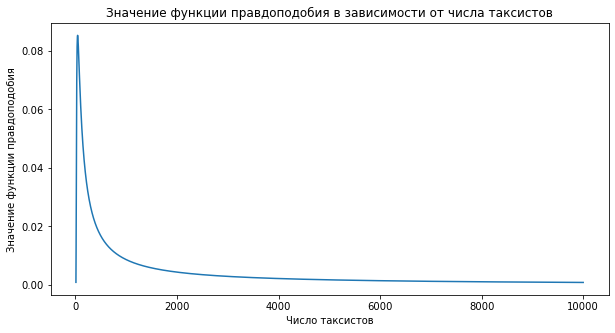

In [29]:
plt.figure(figsize = (10, 5))
plt.plot(np.arange(9, 10001), L_s)
plt.title('Значение функции правдоподобия в зависимости от числа таксистов')
plt.xlabel('Число таксистов')
plt.ylabel('Значение функции правдоподобия')

$$l = lnL = ln(n-1) + ln(n-2) + ln(n-3) + ... + ln(n-8) + ln(9) - 9ln(n)$$ Необходимо максимизировать эту функцию по n. Воспользуемся вольфрамом.

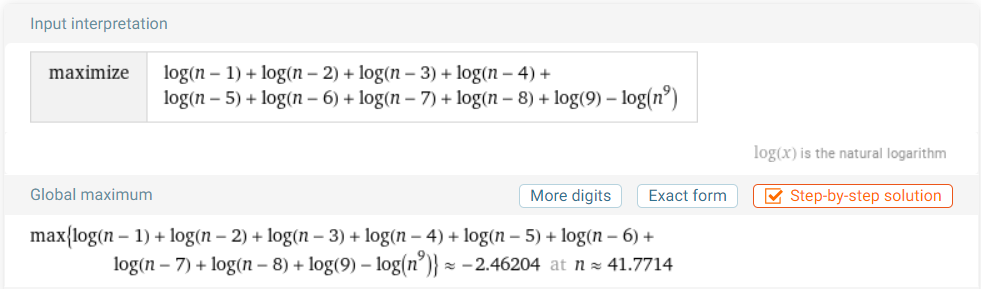

Необходимо округлить получившееся число до 42. Анекдот про полтора таксиста будет не в тему.

 $$n = 42$$

### б)

In [5]:
from tqdm import tqdm

In [118]:
n_s = np.arange(1, 200)
E_s = []

In [119]:
for n in tqdm(n_s):
    E = 0
    for day in range(1, n+2):
        P = 1
        for i in range(1, day - 1):
            P *= (n-i)/n
        P *= (day - 1) / n
        E += P * day
    E_s.append(E)

100%|███████████████████████████████████████████████████████████████████████████████| 199/199 [00:01<00:00, 182.26it/s]


Text(0, 0.5, 'Матожидание')

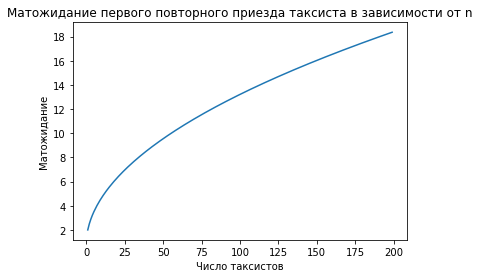

In [128]:
plt.plot(n_s, E_s)
plt.title('Матожидание первого повторного приезда таксиста в зависимости от n')
plt.xlabel('Число таксистов')
plt.ylabel('Матожидание')

Чтобы получить оценку методом моментов нужно приравнять теоретический и выборочный моменты. У нас одно наблюдение. Следовательно, выборочный момент равен 10/1 = 10.
Видим монотонное возрастание матожидания с ростом числа таксистов. Найдём n, при котором достигается наименьшая ошибка между теоретическим и выборочным моментом.

In [126]:
np.argmin(np.abs(np.array(E_s)-10)) + 1


55

Итак, оценка, полученная методом моментов: $$n = 55$$

### в)

In [554]:
np.random.seed(150)

days = []

for i in range(0, 10**4):
    
    dr = []
    day = 1
    r = np.random.choice(range(1,101))
    
    while r not in dr:
        
        dr.append(r)
        day +=1
        r = np.random.choice(range(1,101))
        
    days.append(day)


In [555]:
best_s = []
for day in tqdm(days):
    L_s = []
    for n in range(day-1, 10001):
        L = 1
        for i in range(1, day-1):
            L = L * (n - i)/ n
        L = L * (day-1)/n
        L_s.append(L)
    best = np.argmax(L_s)
    best_s.append(best)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:29<00:00, 37.14it/s]


(array([4.935e+03, 2.218e+03, 1.227e+03, 8.220e+02, 4.290e+02, 1.640e+02,
        1.040e+02, 5.200e+01, 1.500e+01, 2.000e+01, 1.000e+01, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.        ,  53.73333333, 107.46666667, 161.2       ,
        214.93333333, 268.66666667, 322.4       , 376.13333333,
        429.86666667, 483.6       , 537.33333333, 591.06666667,
        644.8       , 698.53333333, 752.26666667, 806.        ]),
 <BarContainer object of 15 artists>)

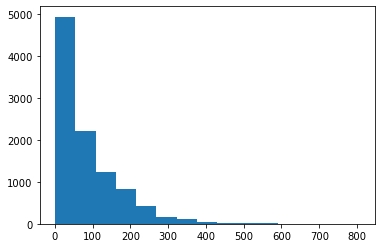

In [556]:
plt.hist(best_s, bins = 15)

In [557]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [558]:
#Смещение
mean_absolute_error(best_s, 10**4*[100])

68.1235

In [559]:
#Дисперсия

In [560]:
np.var(best_s)

7155.618106390001

In [561]:
#Среднеквадратичная ошибка

In [562]:
mean_squared_error(best_s, 10**4*[100])

7426.1581

In [563]:
n_s = np.arange(1, 100)
best_2_s = []

In [570]:
for day1 in tqdm(days):
    E_s = []
    for n in np.arange(1, 100):
        E = 0
        for day in range(1, day1):
            P = 1
            for i in range(1, day - 1):
                P *= (n-i)/n
            P *= (day - 1) / n
            E += P * day
        E_s.append(E)
    best_2 = np.argmin(np.abs(np.array(E_s)-10)) + 1
    print(best_2)
    best_2_s.append(best_2)

  0%|▎                                                                             | 34/10000 [00:00<01:03, 156.22it/s]

16
41
35
68
47
53
5
7
25
30
55
68
7
61
55
69
3
53
13
1
7
53
25
20
35
20
69
30
53
56
20
7
53
58


  1%|▊                                                                             | 99/10000 [00:00<00:49, 200.05it/s]

30
47
35
7
10
25
13
30
25
1
2
60
20
56
60
25
56
58
35
60
35
10
13
13
69
25
30
10
25
7
53
16
13
5
20
16
25
47
58
10
53
58
25
25
3
30
69
13
47
60
3
56
53
25
3
3
20
60
5
68
30
13
47
35
60


  2%|█▏                                                                           | 158/10000 [00:00<00:59, 164.75it/s]

57
10
10
25
10
60
53
13
10
57
13
53
69
47
57
69
69
3
68
30
25
2
13
5
76
10
25
30
69
30
68
16
76
25
60
16
47
76
57
3
56
3
68
60
68
5
69
16
3
60
10
30
55
53
55
58
30
53
56


  2%|█▎                                                                           | 177/10000 [00:01<00:57, 170.00it/s]

76
53
10
5
16
30
5
60
68
3
47
25
69
60
53
61
35
16
53
16
20
61
58
55
5
57
1
30
47
5
3
68
20
13
13
3


  2%|█▋                                                                           | 213/10000 [00:01<00:58, 168.12it/s]

56
25
25
16
35
20
7
25
53
47
53
3
3
55
20
56
76
20
60
41
16
76
5
10
25
56
7
60
16
53
35
20


  3%|██▏                                                                          | 276/10000 [00:01<00:55, 174.14it/s]

56
3
5
25
47
30
16
10
3
76
56
5
30
53
1
76
55
10
68
10
53
47
53
13
7
53
68
58
5
58
20
2
68
41
25
41
16
3
41
10
20
69
7
56
30
20
60
7
61
47
35
35
68

  3%|██▍                                                                          | 318/10000 [00:01<00:50, 191.13it/s]


25
2
20
60
60
55
20
58
20
35
61
20
1
25
2
5
5
60
16
7
10
58
35
25
1
61
1
7
13
13
5
61
56
13
7
7
53
25
76
55
13
60
76
57
53
13
10
76
60
3
16
41
41


  4%|██▉                                                                          | 380/10000 [00:02<00:50, 189.65it/s]

56
3
35
20
47
41
13
25
20
13
10
20
30
76
58
2
13
53
41
2
25
10
58
16
16
41
58
60
76
25
35
2
1
7
1
55
7
76
13
25
13
3
3
47
57
16
7
53
13
1


  4%|███                                                                          | 401/10000 [00:02<00:49, 192.28it/s]

47
68
68
20
13
10
55
47
5
41
53
7
41
30
5
3
76
2
57
41
10
61
35
41
16
47
16
3
25
68
7
56
55
16
41
20
58


  5%|███▋                                                                         | 486/10000 [00:02<00:48, 196.17it/s]

69
13
16
60
47
2
1
5
25
13
56
35
10
3
57
10
41
16
53
2
7
47
30
47
30
53
53
30
53
7
20
25
35
60
35
60
56
53
20
68
7
53
35
3
53
35
47
41
10
5
30
13
35
69
61
41
30
5
47
20
1
47
76
10
41
68
35
35

  6%|████▎                                                                        | 553/10000 [00:02<00:45, 208.82it/s]


41
30
16
20
61
13
30
47
5
56
53
30
25
5
10
2
47
10
30
41
16
25
35
20
41
1
1
57
16
41
7
41
57
13
47
35
25
7
35
7
47
13
41
41
16
1
35
7
41
16
1
53
55
41
56
16
10
13
41
41
10
16
68
53
16
68
47
13
60


  6%|████▊                                                                        | 622/10000 [00:03<00:45, 204.92it/s]

69
53
60
61
13
1
20
2
55
20
47
35
10
25
56
53
13
53
1
16
20
7
2
47
69
25
55
20
61
30
25
47
56
2
76
68
3
57
20
7
68
16
2
1
16
20
58
13
7
30
53
10
60
3
10
30
3
20
10
16
20
3
41
69
57
25
10

  7%|█████▏                                                                       | 667/10000 [00:03<00:46, 200.14it/s]


55
57
25
68
10
68
25
69
61
16
10
5
2
1
68
16
10
5
25
68
2
10
25
2
1
10
3
35
76
76
76
61
13
41
10
47
53
16
61
41
7
53
5
56


  7%|█████▍                                                                       | 708/10000 [00:03<00:49, 187.52it/s]

68
1
20
7
35
10
68
5
60
3
60
58
55
41
13
69
10
30
57
53
20
53
16
53
60
25
5
3
7
7
61
53
1
41
60
53
47
41
56
53
53
53
76
13
3
1
53
25
30
76
53
69
55
20
7
13
30
3
58

  8%|█████▊                                                                       | 750/10000 [00:04<00:47, 193.89it/s]


60
3
53
20
53
47
30
13
35
25
1
55
69
68
16
20
16
3
3
41
13
7
10
20
55
5
76
20
7
10
56
35
3
10
25
60
16
5
30
25
16
10
13
3
30
30
13


  8%|██████▏                                                                      | 796/10000 [00:04<00:45, 203.21it/s]

56
53
30
30
61
35
1
2
41
60
3
47
47
5
13
7
57
16
76
2
60
5
53
47
56
58
16
60
41
58
30
13
16
60
30
16
5
55
69
13


  9%|██████▋                                                                      | 862/10000 [00:04<00:45, 199.58it/s]

76
16
25
55
16
2
60
20
68
47
20
53
1
55
25
20
53
5
13
5
2
76
60
16
10
69
5
1
25
55
69
13
16
16
20
13
53
53
16
41
68
30
5
10
13
20
30
1
25
3
25

  9%|██████▉                                                                      | 906/10000 [00:04<00:45, 200.87it/s]


47
7
56
68
60
7
20
7
20
20
10
55
58
69
16
30
35
35
35
25
16
30
16
13
16
13
60
16
5
56
60
68
47
13
25
16
10
35
68
3
10
53
47
55
60
20
41
20

  9%|███████▎                                                                     | 948/10000 [00:05<00:48, 187.46it/s]


13
56
69
60
35
25
10
53
25
16
3
56
25
1
25
16
69
68
55
10
47
10
25
3
20
69
68
30
68
2
13
30
20
3
13
57
55
41
61
2
30
16
56


 10%|███████▌                                                                     | 990/10000 [00:05<00:48, 184.79it/s]

76
20
58
25
5
47
76
30
10
35
10
55
35
56
7
47
5
30
47
16
1
13
25
30
20
20
56
53
5
25
53
7
41
5
25
68
25
47
76
20
16
25
16
16
56
56
25
13

 10%|███████▊                                                                    | 1029/10000 [00:05<00:51, 173.90it/s]


55
41
56
57
60
25
10
56
10
13
13
2
16
53
47
30
68
41
30
3
57
3
25
41
13
61
56
53
30
47
47
47
53
13
76
10
20
7
2
30
16
47
30
3
30
1
7
10
1


 11%|████████▎                                                                   | 1092/10000 [00:05<00:48, 182.92it/s]

60
47
16
20
53
25
10
53
10
16
3
55
35
68
20
20
13
30
61
35
55
20
13
56
56
10
5
20
7
30
47
10
10
20
20
60
57
16
41
68


 11%|████████▍                                                                   | 1111/10000 [00:06<00:52, 169.12it/s]

53
13
55
41
3
30
16
60
60
13
20
35
61
5
57
13
68
56
58
16
41
60
41
30
76
53
20
30
20
5
58
16


 11%|████████▋                                                                   | 1149/10000 [00:06<00:51, 171.58it/s]

69
41
76
20
16
7
5
61
69
10
53
41
10
5
35
58
7
55
10
20
5
30
16
30
55
53
2
30
61
56
25
69


 12%|█████████▏                                                                  | 1213/10000 [00:06<00:44, 195.98it/s]

61
56
10
20
20
10
3
1
3
56
53
1
25
10
10
60
16
60
16
5
41
1
41
5
35
16
47
20
20
5
35
47
13
60
56
20
57
58
35
41
16
13
3
55
1
13
58
2
7
35
1
20
20
30
20
2
30


 13%|█████████▊                                                                  | 1283/10000 [00:06<00:40, 212.98it/s]

2
5
20
3
16
10
53
13
20
5
60
30
47
61
41
53
60
60
16
3
56
35
16
25
30
25
41
57
30
5
53
10
69
35
30
7
53
16
47
5
13
5
25
53
60
68
56
3
30
10
20
47
57
47
5
3
10
20
30
41
30
30
41
10
68
20
25
1
7
41
47
60
13
60
47
53
41
35
20

 13%|██████████                                                                  | 1325/10000 [00:07<00:45, 188.67it/s]


13
76
7
55
13
5
61
10
60
35
55
7
7
60
20
10
20
5
25
7
53
69
69
7
56
55
3
10
20
10
20
57
5
35
20
30
58
13
68
69
30
10


 14%|██████████▌                                                                 | 1392/10000 [00:07<00:41, 205.41it/s]

61
47
20
35
1
1
41
30
10
69
7
10
41
7
76
2
1
20
47
1
13
2
3
55
25
41
41
20
53
10
61
13
25
30
16
76
20
2
35
2
13
7
47
47
5
53
25
76
25
76
16
25
68
13
16
13
47
58
7
10
61
35
41
5
53
58
55
2
2
53
25
20
20
30
35

 14%|██████████▉                                                                 | 1434/10000 [00:07<00:43, 195.08it/s]


20
53
47
47
53
53
57
68
10
25
30
58
13
41
35
1
10
16
47
25
35
35
56
41
1
20
16
13
47
1
10
25
20
10
30
41
68
5


 15%|███████████▎                                                                | 1482/10000 [00:07<00:39, 217.28it/s]

56
69
56
13
16
47
25
53
3
7
25
13
1
10
35
16
13
3
53
25
25
20
56
47
53
16
10
35
10
1
1
61
10
25
47
10
20
57
3
60
10
47
20
76
16
35
58
10
20
25

 15%|███████████▌                                                                | 1526/10000 [00:08<00:42, 198.61it/s]


13
68
5
16
10
69
25
5
60
2
13
41
55
58
76
47
53
47
1
16
5
35
5
69
20
47
25
69
30
35
3
76
69
58
35
53

 16%|███████████▉                                                                | 1574/10000 [00:08<00:39, 215.22it/s]


30
16
7
68
2
35
13
3
47
30
35
5
47
30
30
47
3
56
35
35
35
35
3
35
35
35
13
1
41
61
13
3
3
20
2
41
5
10
13
41
53
56
3
35
56
61
5
13

 16%|████████████▎                                                               | 1616/10000 [00:08<00:46, 181.38it/s]


60
68
3
76
60
5
68
30
58
41
13
53
56
3
61
10
10
25
30
61
35
57
13
47
13
25
61
56
16
16
25
25
20
35
68
5
35
30
35
10
25
7
5
47
35
53


 17%|████████████▋                                                               | 1663/10000 [00:08<00:42, 194.20it/s]

68
10
13
5
13
76
53
13
53
20
47
2
47
68
2
30
7
5
60
3
56
2
76
2
13
30
16
68
60
35
76
68
7
53
30
55
55
5
30
60
68
10
16
10
35
16
16

 17%|████████████▉                                                               | 1708/10000 [00:09<00:40, 205.66it/s]


5
25
55
10
58
1
7
30
20
10
13
5
56
16
30
13
76
30
30
35
20
2
3
13
41
20
7
76
10
30
35
41
10
57
30
13
10
57
16
20
53
30
53
76
68
25
13
7
5

 18%|█████████████▎                                                              | 1757/10000 [00:09<00:37, 222.51it/s]


60
41
20
53
47
47
76
16
1
47
69
16
25
30
5
7
41
10
2
20
58
20
61
13
35
20
20
7
7
41
5
3
7
41
60
61
68
2
60


 18%|█████████████▋                                                              | 1802/10000 [00:09<00:38, 212.10it/s]

61
20
16
68
1
5
60
20
20
13
35
41
60
25
20
30
10
30
68
47
10
76
20
30
5
20
7
3
35
30
41
13
10
10
30
35
58
61
76
7
13
2
47
60
60
10
30
7
16
68
69
41


 18%|██████████████                                                              | 1845/10000 [00:09<00:39, 204.03it/s]

55
25
30
20
30
41
2
3
13
1
16
68
35
13
7
16
76
20
56
1
30
53
58
25
10
35
25
47
35
5
53
25
60
30
41
60
5
76
2
16
47
76
35
30

 19%|██████████████▎                                                             | 1887/10000 [00:09<00:43, 188.60it/s]


30
5
35
16
30
57
30
2
55
60
61
41
20
68
69
60
25
16
1
16
69
7
5
20
41
60
25
61
25
35
7
5
5
53
25
68
13
20
2
5
76
1
47
2

 19%|██████████████▋                                                             | 1933/10000 [00:10<00:41, 195.67it/s]


13
68
69
5
5
35
60
76
16
47
47
60
76
7
60
7
41
16
56
10
76
16
10
61
41
13
13
35
60
16
35
68
16
10
53
76
20
53
47

 20%|██████████████▉                                                             | 1973/10000 [00:10<00:42, 190.08it/s]


68
25
1
20
55
56
5
2
3
30
47
13
76
2
5
10
60
47
53
35
2
30
35
5
35
41
5
69
5
53
55
16
16
35
47
10
41

 20%|███████████████▎                                                            | 2013/10000 [00:10<00:42, 186.47it/s]


25
69
13
60
16
41
3
13
47
5
20
58
55
47
30
41
30
30
60
16
47
30
20
20
13
53
25
20
68
35
35
3
56
3
53
41
30
60

 21%|███████████████▌                                                            | 2054/10000 [00:10<00:41, 193.62it/s]


20
5
10
53
68
7
41
53
30
20
60
16
53
20
7
53
61
30
30
47
25
35
60
68
47
47
2
60
13
69
2
53
41
2
53
20
5
68
60
3
56
1
16
13
13
3
30
60
1
55
13
35
25


 21%|████████████████                                                            | 2116/10000 [00:11<00:41, 191.55it/s]

56
13
13
47
61
60
20
13
47
30
35
25
13
41
47
60
30
41
35
30
35
5
25
30
68
55
20
30
68
69
30
1
68
25
41
76
1
56
35
7
25
5
35
20
68
10
10


 22%|████████████████▍                                                           | 2162/10000 [00:11<00:38, 205.92it/s]

10
76
53
41
68
25
20
20
25
1
16
76
35
2
76
7
30
60
53
47
10
41
20
20
13
47
7
25
7
76
30
10
3
1
10
25
20
47
2
76
41
16
69
61
16
56


 22%|████████████████▊                                                           | 2211/10000 [00:11<00:35, 217.71it/s]

7
69
10
7
68
47
76
35
10
7
69
30
16
5
25
69
41
47
5
5
20
7
5
35
35
30
76
3
10
25
55
20
25
25
25
25
2
3
76
10
25
41
47
13
20
1
68
7
61
68

 22%|████████████████▉                                                           | 2233/10000 [00:11<00:37, 205.60it/s]


35
58
41
30
60
16
25
60
69
30
41
5
7
5
76
5
47
60
47
10
60
35
60
3
7
76
35
41
5
30
35
25
16
30
7
68
60
16
47
41
16
53
1
2
5
25


 23%|█████████████████▎                                                          | 2281/10000 [00:11<00:35, 215.07it/s]

61
5
68
13
56
13
35
1
76
76
7
5
47
10
20
53
41
41
10
25
35
53
3
10
16
68
20
55
60
20
30
7
16
53
47
76
69
25
56


 23%|█████████████████▊                                                          | 2347/10000 [00:12<00:37, 205.55it/s]

47
10
60
7
35
76
25
35
53
16
35
7
68
35
10
16
1
25
68
69
58
20
30
10
1
25
76
57
7
47
56
41
25
5
41
30
35
30
5
10
13
1
10
25
3
76
10
2
20
76
3
25
16
3
3
41
35
13
41
7
16
58
20
60
53
25
60
13
25
5
55
60

 24%|██████████████████▎                                                         | 2415/10000 [00:12<00:37, 204.74it/s]


68
56
10
20
25
1
1
35
13
7
56
5
41
5
53
53
16
60
20
3
3
53
13
76
16
25
61
68
5
55
16
56
5
1
16
25
13
20
41
69
7
20
68
16
69
2
55
25
10
76
5
41


 25%|██████████████████▉                                                         | 2491/10000 [00:12<00:32, 228.02it/s]

61
60
41
3
35
3
13
53
35
30
35
35
61
53
61
5
16
25
10
25
25
3
10
35
16
20
3
53
30
41
3
13
3
57
3
47
47
10
30
30
57
13
3
20
2
20
53
3
13
7
30
2
10
53
47
5
35
1
13
20
53
25
47
30
76
68
13
69
16
41
30

 25%|███████████████████▎                                                        | 2538/10000 [00:13<00:34, 217.62it/s]


61
13
16
5
41
10
3
10
35
25
41
2
53
25
20
25
20
25
68
58
68
76
60
57
16
68
30
10
69
10
10
47
2
35
1
60
41
5
53
56
30
69
16
3
5
35
35
35
41
20
61
20
56
68
13
35
25
3
68
3
41
20
2
47
30


 26%|███████████████████▊                                                        | 2603/10000 [00:13<00:36, 204.20it/s]

55
16
13
76
25
16
55
20
69
2
7
2
57
10
20
7
76
30
7
25
7
13
30
35
41
60
30
16
3
53
55
68
5
30
47
35
2
30
5
25
3
61
56
5
25
35
2
76

 26%|████████████████████                                                        | 2644/10000 [00:13<00:38, 193.20it/s]


47
2
1
16
25
7
55
13
55
68
76
13
69
16
20
10
7
53
25
25
53
10
53
2
7
25
30
56
20
10
56
53
47
47
30
35
7
20
61
69
60
10
13
3
25
58
47
47
7
16
10
47
25
56
10

 27%|████████████████████▍                                                       | 2684/10000 [00:13<00:38, 187.77it/s]


3
69
30
30
1
1
60
41
53
68
16
7
47
25
35
13
13
5
55
25
76
69
7
10
3
56
76
20
56
25


 27%|████████████████████▊                                                       | 2745/10000 [00:14<00:38, 189.99it/s]

76
1
13
47
25
2
25
60
13
5
61
69
35
35
5
47
10
16
76
53
69
7
16
61
1
56
16
13
3
76
5
53
20
1
30
7
47
20
53
68
7
60
61
25
7
25
68
56
13
35
1
16
7
20
57
2
25
57
56
10
10
69
3
20
7

 28%|█████████████████████▏                                                      | 2787/10000 [00:14<00:37, 193.53it/s]


10
16
35
13
57
10
10
10
35
60
25
47
41
1
5
60
13
56
60
57
7
68
53
47
10
30
13
53
47
2
30
10
35
10
76
3
5
7
2
56
76
7
5
10
7
76
60
10
69

 28%|█████████████████████▋                                                      | 2849/10000 [00:14<00:37, 190.68it/s]


41
30
13
1
57
55
20
7
13
20
2
5
35
76
76
25
61
57
41
41
30
25
3
30
10
20
60
16
35
5
61
25
60
68
5
41
20
69
7
16
25
56
20
5
76
25
10
20
3
13
30
5
3
20
35
16
5


 29%|█████████████████████▉                                                      | 2894/10000 [00:14<00:34, 205.38it/s]

53
16
16
76
5
25
69
56
76
7
68
3
25
2
57
56
5
69
16
1
20
7
13
10
41
53
3
56
20
3
76
7
41
47
61
5
25
20
10
58
16

 29%|██████████████████████▎                                                     | 2938/10000 [00:15<00:34, 203.11it/s]


20
16
16
30
57
25
41
16
7
30
58
30
53
25
47
53
53
7
25
53
25
30
20
20
30
30
53
1
10
30
53
5
61
2
61
61


 30%|██████████████████████▍                                                     | 2959/10000 [00:15<00:40, 172.20it/s]

56
60
3
76
57
35
47
53
56
47
16
35
13
55
55
53
3
3
47
25
61
55
10
2
53
20
25


 30%|██████████████████████▊                                                     | 3000/10000 [00:15<00:38, 184.05it/s]

56
30
7
3
56
47
10
35
7
20
76
60
20
60
76
25
1
25
47
10
10
16
69
30
41
16
10
35
58
10
10
20
7
76
13
2
53
61
10
53
47
20
7
57
30
10
68


 30%|███████████████████████                                                     | 3038/10000 [00:15<00:38, 182.73it/s]

68
35
53
13
56
20
60
30
1
20
5
5
68
58
5
25
68
41
16
3
60
10
76
13
3
55
53
53
56
25
10
1
61
55
7
41
60
35
69

 31%|███████████████████████▍                                                    | 3079/10000 [00:15<00:38, 180.34it/s]


57
2
61
20
53
10
60
7
13
5
1
41
3
30
35
76
10
60
25
25
10
7
16
25
47
30
20
25
3
25
53
7
35
68
7
3
2
10
41
16
10
30
57
16
60
13
76
20
16

 31%|███████████████████████▊                                                    | 3127/10000 [00:16<00:35, 196.12it/s]


3
25
13
41
13
30
7
25
58
5
41
16
3
41
41
41
13
61
47
68
30
55
68
68
25
30
3
5
2
55
5
16
53
13
76
13
25
69

 32%|████████████████████████                                                    | 3169/10000 [00:16<00:34, 198.37it/s]


5
25
35
35
13
3
41
16
35
47
41
2
35
20
58
13
20
47
30
76
56
25
30
2
41
13
20
20
25
56
13
35
3
57
41
47
25
53
20
20


 32%|████████████████████████▍                                                   | 3209/10000 [00:16<00:37, 180.34it/s]

55
16
7
41
35
30
25
60
20
60
68
55
47
76
69
76
60
69
60
20
5
69
2
76
10
35
30
13
10
58
41
41
35
5
3
41
69
5
53
69
60
25
13
10
41
25


 32%|████████████████████████▋                                                   | 3247/10000 [00:16<00:37, 180.38it/s]

55
57
1
10
10
60
13
61
25
13
53
76
56
20
20
60
30
1
47
7
2
30
58
20
53
16
7
53
3
13
68
20
25
10
30
10
20
2
47
68
16
10
53
7
35

 33%|█████████████████████████                                                   | 3297/10000 [00:17<00:31, 210.85it/s]


76
41
41
16
16
7
10
7
10
10
55
20
47
16
20
7
20
5
60
53
60
13
16
7
30
53
47
30
10
53
61
61
20
76
41
47
16
30
35
5
69
2
25
47
35
16
25
47


 33%|█████████████████████████▍                                                  | 3341/10000 [00:17<00:33, 200.60it/s]

57
69
1
16
30
30
10
30
58
10
56
13
3
7
20
3
13
41
7
68
30
41
58
76
25
47
60
57
5
30
35
16
20
60
60
76
47
1
41
10
56


 34%|█████████████████████████▊                                                  | 3401/10000 [00:17<00:37, 177.28it/s]

76
30
3
41
53
25
55
41
60
76
35
76
7
20
25
13
25
20
76
10
53
61
1
13
5
41
76
61
25
69
53
16
69
16
55
5
60
7
60
47
68
13
41
10
60
61
53
53
68
47

 35%|██████████████████████████▎                                                 | 3470/10000 [00:17<00:32, 199.72it/s]


1
56
16
13
2
20
35
30
5
5
13
20
30
41
69
1
41
30
35
3
30
35
13
60
2
30
30
35
69
30
1
69
47
13
16
3
30
16
30
35
68
53
20
16
20
55
2
53
30
10
76
76
35
16
35
41
60
53
2
35
13
3
7
20
16
41

 35%|██████████████████████████▋                                                 | 3519/10000 [00:18<00:30, 209.27it/s]


76
1
7
55
3
55
30
35
16
35
30
7
76
35
25
69
53
13
68
47
10
25
1
16
76
20
16
1
30
68
7
20
10
5
5
35
30
60
41
2
16
30
41
7
53


 35%|██████████████████████████▉                                                 | 3541/10000 [00:18<00:33, 191.83it/s]

56
10
69
68
41
61
13
47
76
35
7
55
25
2
10
13
3
16
25
61
47
2
25
30
68
7
30
25
10
16
1
69
10
3
76
1
61
2
53


 36%|███████████████████████████▏                                                | 3581/10000 [00:18<00:33, 192.40it/s]

57
57
53
1
41
69
41
2
3
69
41
76
20
41
41
53
30
41
69
3
20
35
20
68
47
25
13
10
69
2
55
61
13

 36%|███████████████████████████▌                                                | 3625/10000 [00:18<00:32, 193.30it/s]


35
35
16
16
13
16
35
20
68
69
10
3
53
47
30
10
10
1
35
56
25
1
7
41
16
16
68
13
35
20
58
13
16
55
13
55
1
35
30
41
69
30
69
7
20
20

 37%|███████████████████████████▉                                                | 3671/10000 [00:19<00:30, 210.00it/s]


13
68
20
20
1
5
16
61
2
25
16
61
25
20
3
30
35
1
25
58
16
25
76
7
1
13
13
13
10
60
5
20
56
41
68
61
55
47
20

 37%|████████████████████████████▏                                               | 3717/10000 [00:19<00:31, 199.82it/s]


41
30
69
16
5
41
3
47
76
7
13
69
55
3
10
10
41
30
7
5
35
47
53
10
25
1
25
53
13
60
13
30
55
5
47
10
13
10
68
41
68
30
56
2
47
5
47
1
1
60

 38%|████████████████████████████▌                                               | 3763/10000 [00:19<00:29, 213.40it/s]


5
47
35
30
13
2
68
56
3
35
30
16
5
7
57
25
13
68
69
16
60
20
1
5
7
20
10
3
25
60
25
47
30
53
3
10
41
41
13
41
5
47
3
47
20
76
56
13


 38%|████████████████████████████▉                                               | 3806/10000 [00:19<00:31, 197.77it/s]

55
1
68
16
25
30
60
25
2
69
76
68
68
25
16
7
16
53
35
25
53
35
68
5
2
47
5
25
5
5
61
58
30
10
41
53
7
10
47
56
25
7
76
5
41
53
25
16
25
53
47

 38%|█████████████████████████████▏                                              | 3848/10000 [00:19<00:35, 174.44it/s]


35
35
25
35
55
47
56
41
35
69
20
20
25
10
35
30
7
69
56
13
68
16
60
1
68
41
5
53

 39%|█████████████████████████████▌                                              | 3891/10000 [00:20<00:32, 189.93it/s]


25
2
20
47
7
10
47
47
76
53
41
47
7
41
5
16
10
7
7
53
1
25
58
53
20
56
16
7
35
69
1
7
16
7
68
13
5
60
10

 39%|█████████████████████████████▉                                              | 3932/10000 [00:20<00:32, 188.60it/s]


41
53
53
10
10
20
16
60
41
58
20
2
53
69
30
69
76
41
58
13
16
60
41
68
16
5
5
10
35
41
56
35
3
16
3
68
57
35
16
60
69
1
60
60
13
60
16
57
69


 40%|██████████████████████████████▏                                             | 3977/10000 [00:20<00:30, 198.91it/s]

41
68
61
13
20
47
60
20
20
53
30
41
68
68
16
13
35
53
13
13
30
25
16
30
60
16
41
5
25
2
16
35
35
41
13
35
3
1
5
10
13
7
16
60
61
60
76
2
20
47
10
35
1
76
25


 40%|██████████████████████████████▌                                             | 4020/10000 [00:20<00:33, 179.57it/s]

61
25
35
56
20
35
10
68
13
57
25
30
20
35
58
55
47
7
61
1
61
20
30
20
3
20
5
10
3
25
7
20
41
69

 41%|██████████████████████████████▉                                             | 4071/10000 [00:21<00:29, 197.68it/s]


16
53
10
53
3
30
53
5
5
76
5
20
30
68
1
5
47
1
30
60
61
13
16
41
25
10
7
53
76
16
5
10
20
25
69
16
5
25
16
55
68


 41%|███████████████████████████████                                             | 4092/10000 [00:21<00:30, 195.37it/s]

41
30
35
68
41
53
10
13
20
53
61
56
7
30
30
25
13
68
35
16
2
53
58
25
1
76
3
53
2
13
41
13
76
25
20
30
68


 42%|███████████████████████████████▌                                            | 4158/10000 [00:21<00:28, 205.46it/s]

61
53
35
25
60
20
13
5
57
25
41
2
25
53
30
20
25
20
25
20
10
41
3
61
25
41
20
30
1
3
25
13
47
35
25
35
56
1
16
41
16
3
76
30
5
61
47
76
10
58


 42%|███████████████████████████████▉                                            | 4204/10000 [00:21<00:26, 215.95it/s]

25
16
47
56
16
16
16
76
56
3
25
10
25
47
35
16
16
25
60
13
47
35
69
5
47
25
56
30
2
20
20
13
7
2
60
13
25
47
69
10
30
3
47
20
7
47
13
35
1
3
25
5
60
16
25
35
41
30
25
16
35
41
20
25
7
60
10
7
10
60
20
25


 43%|████████████████████████████████▎                                           | 4256/10000 [00:21<00:26, 220.75it/s]

53
53
60
41
76
13
25
3
7
41
16
13
61
25
5
5
1
13
13
53
69
13
30
55
53
47
25
10
25
57
41
60
35
16
58
7
60

 43%|████████████████████████████████▋                                           | 4301/10000 [00:22<00:27, 210.37it/s]


60
10
35
25
3
53
30
3
58
5
30
3
2
60
7
16
30
60
16
1
60
5
61
5
1
76
56
7
16
53
47
60
35
5
61
2
1
68

 43%|█████████████████████████████████                                           | 4346/10000 [00:22<00:27, 208.11it/s]


41
41
20
53
61
10
41
35
41
2
1
35
68
47
16
69
10
13
3
16
41
16
30
53
35
53
10
35
58
69
16
7
20
30
30
25
25
1
25
60
57
30
41
7
47
10
47
10
3
41
53
5
2
25
25


 44%|█████████████████████████████████▍                                          | 4398/10000 [00:22<00:29, 189.61it/s]

41
30
35
30
5
5
25
35
69
3
25
10
1
3
57
13
56
58
61
20
41
53
20
58
58
47
68
55
7
35
69
60
56
10
20
7
20
3


 44%|█████████████████████████████████▊                                          | 4443/10000 [00:22<00:27, 200.58it/s]

69
30
47
25
13
25
10
30
30
30
13
41
69
68
13
60
30
41
1
16
7
35
30
41
41
3
16
25
30
55
20
30
53
68
7
10
35
41
7
41
2
60
10
53
30
3
25
41
53
30
20
30
16
2
30
68
5
30
30
68
47
5
68
61
41

 45%|██████████████████████████████████                                          | 4485/10000 [00:23<00:30, 178.59it/s]


3
25
13
10
13
25
58
35
41
5
55
35
53
76
3
25
16
76
47
76
55
25
69
76
5
1
69
30
47
20

 45%|██████████████████████████████████▍                                         | 4528/10000 [00:23<00:29, 186.15it/s]


5
7
47
5
1
16
47
20
47
60
53
5
3
2
61
13
25
35
25
7
13
69
41
20
16
68
1
69
55
25
57
20
1
68
60
53
30


 46%|██████████████████████████████████▉                                         | 4593/10000 [00:23<00:28, 192.61it/s]

69
16
60
41
35
41
7
5
2
10
20
41
35
41
20
25
30
76
68
68
69
7
35
56
25
58
10
53
56
53
10
5
47
13
58
35
25
30
60
25
7
53
35
13
55
68
13
25
5
41
13
16
10
41
10
30
5
7
1
68
30
47
58


 46%|███████████████████████████████████▎                                        | 4642/10000 [00:23<00:26, 203.45it/s]

60
35
76
16
25
25
25
47
60
10
25
7
3
16
41
25
13
13
16
20
41
60
7
53
16
7
3
35
55
3
5
68
20
30
25
16
5
1
3
20
53
20
57
41
1
61
60
47
69
68
47
60
47
2
69
13
7
47
76

 47%|███████████████████████████████████▌                                        | 4684/10000 [00:24<00:27, 191.51it/s]


53
57
16
60
3
3
61
16
20
1
57
16
10
2
60
56
61
16
58
2
25
35
5
41
5
30
60
53
25
47
16
57
35
56
2
25
53


 47%|███████████████████████████████████▉                                        | 4722/10000 [00:24<00:31, 166.05it/s]

55
55
16
76
35
53
30
69
56
30
20
55
10
68
16
35
2
30
20
41
68
13
41
55
35
41
35
30
57
30
68
20
25
10
25
30
76
41
5
30
20
5
7
16
60
16
20

 48%|████████████████████████████████████▏                                       | 4769/10000 [00:24<00:28, 185.36it/s]


7
1
69
41
7
76
47
25
13
30
13
5
47
3
58
2
47
25
16
76
69
7
35
2
16
3
35
58
55
53
30
68
53
7
35
20
20
20
30
68
55
47
20
13
35
41
1
10

 48%|████████████████████████████████████▋                                       | 4835/10000 [00:24<00:25, 200.55it/s]


41
53
13
30
41
10
68
25
5
10
30
16
1
41
3
41
35
16
30
30
53
47
47
2
69
56
60
10
3
68
55
10
30
35
1
41
16
47
20
47
35
41
20
13
25
57
5
56
47
3
10


 49%|█████████████████████████████████████                                       | 4883/10000 [00:25<00:23, 218.16it/s]

25
20
25
20
10
56
55
16
30
35
47
3
30
41
25
2
25
30
3
2
35
7
61
1
69
5
7
41
16
10
16
68
2
3
61
10
69
10
30
76
13
25
3
61
16
1
13
53


 50%|█████████████████████████████████████▋                                      | 4951/10000 [00:25<00:24, 207.67it/s]

10
10
16
60
1
47
35
10
47
16
41
56
53
69
35
13
3
58
1
35
7
20
13
13
35
53
13
41
56
13
76
47
20
20
58
1
35
10
25
35
3
30
76
20
5
47
41
60
20
10
16
41
76
61
25
69
68
41
35
30
60
76
47
16
10
60
2
30


 50%|██████████████████████████████████████▏                                     | 5017/10000 [00:25<00:24, 205.38it/s]

41
35
13
10
41
20
30
2
76
5
1
30
53
57
61
5
68
41
35
58
13
25
41
53
7
41
13
13
5
41
20
13
56
68
30
7
3
35
57
25
25
35
10
3
61
30
13
30
47
47
30
5
55
25
20
13
7
10
30
20
53
61
35
58
16
7


 51%|██████████████████████████████████████▋                                     | 5086/10000 [00:26<00:24, 203.02it/s]

10
13
61
25
13
16
35
20
3
13
7
20
16
58
47
35
53
60
30
25
35
10
20
58
47
16
41
30
47
68
60
68
20
57
35
2
56
13
25
57
47
7
30
47
10
25
47
10
35
16
10
35
30
60
10
41
7
56
60
76
16
76
41
35
5
10
41
7
61


 51%|███████████████████████████████████████                                     | 5135/10000 [00:26<00:22, 216.42it/s]

41
13
20
13
16
76
16
35
60
3
47
25
5
16
25
60
1
10
10
20
30
5
69
60
2
20
61
2
47
57
35
20
35
55
5
13
41
60
10
25
7
60
13
10
35
69
41
10
3


 52%|███████████████████████████████████████▍                                    | 5181/10000 [00:26<00:23, 203.62it/s]

20
35
69
16
7
60
5
25
10
7
41
16
68
10
76
53
7
30
53
47
3
68
7
35
60
20
7
25
58
10
53
56
16
55
3
7
25
60
76
13
68
20
25
10
35
41
5
68
53
69
47
47
7
10
25
20
68
69
35
3
56
13
20

 52%|███████████████████████████████████████▋                                    | 5227/10000 [00:26<00:22, 210.80it/s]


61
53
3
10
10
25
60
16
16
60
60
7
25
30
53
7
47
68
20
20
13
1
7
7
69
57
5
3
16
3
2
41
16
56
16
13
20
7
16
68
68
76
56
3
30
25
53


 53%|████████████████████████████████████████▎                                   | 5297/10000 [00:27<00:21, 217.96it/s]

56
25
7
13
35
60
61
30
20
30
7
25
53
2
76
25
2
13
76
30
41
41
10
41
13
41
56
53
3
20
16
7
25
41
76
1
47
35
7
47
30
61
41
35
16
60
2
35
76
10
5
13
58
10
2
13
60


 53%|████████████████████████████████████████▌                                   | 5341/10000 [00:27<00:23, 196.76it/s]

47
35
76
25
53
25
13
47
60
41
30
35
10
5
25
69
30
53
5
7
55
76
53
10
3
47
20
10
25
10
35
57
30
53
56
47
58
10
35
20

 54%|█████████████████████████████████████████                                   | 5404/10000 [00:27<00:23, 199.29it/s]


10
56
16
41
68
41
35
41
76
16
5
13
20
60
20
76
69
47
47
10
20
56
60
1
56
47
16
16
47
35
57
10
7
30
5
69
35
20
7
60
25
3
30
53
35
35
47
20
5
3
3
76
69
1
7
16
41
20
61
57
20
25
53

 54%|█████████████████████████████████████████▍                                  | 5446/10000 [00:27<00:22, 198.84it/s]


47
20
55
13
61
3
10
60
76
5
13
61
47
25
1
25
20
13
25
60
58
13
10
20
57
20
3
55
10
7
10
20
2
16
7
25
41
5
25
30
53
69
35
55
20
3
25
69
47
5
13
58
7
60
41
55


 55%|█████████████████████████████████████████▋                                  | 5485/10000 [00:28<00:26, 170.28it/s]

58
1
68
16
2
60
30
25
41
1
7
60
56
53
16
35
13
25
10
25
56
41
55
53
35
60
16
1
1
56
13
30
13
20
41
53
76
1
30
3
35
16


 56%|██████████████████████████████████████████▏                                 | 5556/10000 [00:28<00:20, 214.34it/s]

56
58
20
10
41
25
58
7
58
20
2
7
2
61
16
76
68
2
25
56
2
16
5
25
20
20
35
47
41
35
20
16
20
10
61
1
25
13
30
7
3
35
25
1
5
61
30
30
20
2
53
30
20
76
47
47
41
25
1


 56%|██████████████████████████████████████████▊                                 | 5625/10000 [00:28<00:20, 215.44it/s]

61
76
16
20
68
69
20
60
57
3
60
30
60
3
35
3
10
30
10
25
25
76
16
20
69
16
41
41
56
30
10
53
16
58
5
41
13
61
5
2
20
47
7
47
53
30
47
61
5
60
16
2
5
7
25
30
53
7
1
20
7
76
47
5
68
76
58
16
10
55
56
25
68
60
69

 57%|███████████████████████████████████████████                                 | 5668/10000 [00:29<00:22, 195.64it/s]


20
41
53
7
20
7
56
20
30
35
20
25
25
60
35
61
25
16
25
35
68
7
35
7
41
5
56
5
20
69
10
56
20
41
13
35
41
10
13
56
60
7
47
16
53
13
1
7
41
56
20

 57%|███████████████████████████████████████████▌                                | 5735/10000 [00:29<00:21, 196.20it/s]


7
35
13
56
25
25
60
47
56
35
61
25
55
3
53
20
3
10
61
47
2
55
3
3
13
10
35
3
25
53
20
60
76
13
56
20
3
47
13
35
35
16
13
69
60
3
20


 58%|███████████████████████████████████████████▋                                | 5756/10000 [00:29<00:22, 189.83it/s]

20
7
60
25
41
1
25
60
76
76
25
1
57
20
1
5
16
61
53
56
68
10
13
13
56
58
16
25
3
41
5
16
5
25
53
10
35
13
2
41
69
3
20
20


 58%|████████████████████████████████████████████▎                               | 5826/10000 [00:29<00:20, 205.80it/s]

56
3
20
20
13
13
20
3
30
2
30
61
35
20
20
58
2
25
35
20
35
57
41
47
53
69
10
35
7
5
53
76
53
5
25
41
35
7
69
35
7
16
35
58
20
55
10
69

 58%|████████████████████████████████████████████▍                               | 5847/10000 [00:29<00:20, 204.27it/s]


30
47
35
55
30
16
10
10
7
10
7
25
47
60
25
47
16
30
25
35
10
57
41
53
30
7
60
69
16
20
76
5
25
10
68
69
69
5
20
47
56

 59%|████████████████████████████████████████████▋                               | 5888/10000 [00:30<00:22, 186.35it/s]


53
25
41
7
20
61
47
69
1
60
30
47
16
7
7
35
1
60
35
61
25
69
7
7
60
5
68
76
47


 59%|█████████████████████████████████████████████                               | 5926/10000 [00:30<00:23, 172.85it/s]

55
7
41
10
76
60
3
69
41
57
2
53
61
20
20
76
56
58
3
30
61
3
7
10
35
7
7
30
35
10
20
25
5
16
60
55
30
35

 60%|█████████████████████████████████████████████▎                              | 5966/10000 [00:30<00:22, 177.53it/s]


25
10
47
68
13
35
35
16
13
30
10
53
76
56
5
61
35
60
13
58
13
68
13
5
68
10
20
61
7
20
10
35
20
25
20
25
3
41
47
25
76
68
69
41
35
13
25
25
1
41


 60%|█████████████████████████████████████████████▋                              | 6007/10000 [00:30<00:21, 189.90it/s]

56
16
16
56
25
55
68
7
7
16
53
56
10
10
3
25
7
13
10
13
10
16
35
7
30
76
10
57
7
2
5
5
30
56
16
61
41
60


 60%|█████████████████████████████████████████████▉                              | 6047/10000 [00:31<00:22, 178.33it/s]

55
16
1
47
68
2
35
16
53
20
35
47
7
2
57
41
58
10
76
53
7
53
30
58
53
7
2
41
58
25
16
47
7
3
10
13
53
30
47
2
20
35


 61%|██████████████████████████████████████████████▍                             | 6111/10000 [00:31<00:20, 187.72it/s]

53
7
58
25
3
61
25
16
53
1
47
68
56
30
5
20
60
60
25
30
35
76
53
25
1
16
47
41
30
1
16
10
53
3
41
55
41
58
69
16
25
56
7
13
53
10
58

 62%|██████████████████████████████████████████████▊                             | 6156/10000 [00:31<00:19, 195.02it/s]


47
5
3
68
69
55
55
20
1
53
20
30
53
25
16
68
7
20
13
5
53
25
5
60
35
3
30
3
35
13
20
2
57
10
7
25
25
60
10
41
35
35
76
53


 62%|███████████████████████████████████████████████▏                            | 6201/10000 [00:31<00:20, 186.64it/s]

30
57
41
3
35
30
10
30
25
20
25
7
7
5
35
57
1
5
35
47
20
25
58
57
53
2
68
1
5
41
10
7
53
16
5
55
30
55
69
5
7
58
35
55
58
7
61
68
47
35


 62%|███████████████████████████████████████████████▍                            | 6240/10000 [00:32<00:20, 179.52it/s]

58
57
41
60
60
25
5
41
10
16
3
76
2
3
13
1
16
35
7
7
60
56
30
7
7
61
76
1
57
10
16
2
55
5
35
69
41

 63%|███████████████████████████████████████████████▋                            | 6279/10000 [00:32<00:20, 177.99it/s]


13
53
7
7
16
3
61
47
76
47
68
41
47
16
41
16
35
61
69
61
10
20
76
30
7
68
61
30
56
3
47
16
2
7
69
7
35
10
20
76
41
2
35
25
35
1
20
16
60
7
20

 63%|████████████████████████████████████████████████                            | 6327/10000 [00:32<00:18, 198.08it/s]


56
16
30
25
41
5
25
7
7
55
30
35
16
10
16
60
56
53
1
41
16
20
10
7
5
5
35
25
58
53
13
13
56
41
13
3
2
58
35
57
16
10
56
41
10
35
57

 64%|████████████████████████████████████████████████▍                           | 6367/10000 [00:32<00:19, 182.98it/s]


10
25
5
5
76
16
53
47
47
1
41
30
16
30
53
16
5
56
60
69
56
47
20
1
47
69
25
56
3
41
56
7
7
41
30
56
20
30

 64%|████████████████████████████████████████████████▋                           | 6404/10000 [00:33<00:21, 169.60it/s]


1
5
5
56
60
47
47
57
56
47
41
30
60
35
53
16
57
47
10
2
16
47
35
47
5
53
3
25
47
58
7
10
2
25
68
20
13
13
41
76


 64%|████████████████████████████████████████████████▉                           | 6447/10000 [00:33<00:19, 186.51it/s]

56
7
25
35
20
30
41
5
69
5
41
10
25
7
47
41
58
3
3
35
60
35
47
60
53
57
41
35
35
20
30
53
3
68
53
30
25
25
7
47
68
69
5
20
5
57
25
25

 65%|█████████████████████████████████████████████████▎                          | 6488/10000 [00:33<00:18, 189.55it/s]


10
20
53
41
41
30
53
55
55
16
16
69
13
20
7
1
25
20
16
53
1
13
16
61
5
25
25
10
41
16
47
7
20
7
47
13
41
16
13
3
25
25
57

 66%|█████████████████████████████████████████████████▊                          | 6560/10000 [00:33<00:15, 215.96it/s]


2
53
41
10
13
56
7
41
30
35
3
35
13
5
3
60
30
25
60
3
30
25
47
60
5
60
13
53
30
13
16
47
47
56
76
35
30
10
7
41
53
13
58
68
16
35
7
10
3
1
5
13
61
53
53
7
3
16
41
53
20
69

 66%|██████████████████████████████████████████████████▏                         | 6603/10000 [00:33<00:17, 197.42it/s]


53
47
61
25
25
57
25
41
68
30
2
47
53
35
20
10
30
69
2
25
25
2
20
68
20
61
68
20
35
57
57
7
7
25
41
10
10
68


 66%|██████████████████████████████████████████████████▍                         | 6643/10000 [00:34<00:17, 189.08it/s]

53
20
56
56
35
13
13
61
16
10
41
7
7
60
69
10
30
16
25
58
20
25
56
47
10
3
1
16
20
20
7
1
55
3
20


 67%|██████████████████████████████████████████████████▊                         | 6682/10000 [00:34<00:17, 184.68it/s]

58
35
69
60
13
35
16
5
20
5
60
10
35
25
55
76
61
10
47
10
41
1
53
35
57
16
53
61
25
68
35
47
47
10
5
69
13


 67%|███████████████████████████████████████████████████                         | 6720/10000 [00:34<00:17, 184.06it/s]

47
69
30
30
35
1
41
5
53
35
41
57
13
41
53
13
56
25
2
3
25
16
35
56
25
16
47
3
55
47
16
41
5
30
5
76
35
1
47
5
58


 67%|███████████████████████████████████████████████████▏                        | 6739/10000 [00:34<00:18, 175.35it/s]

61
58
41
35
60
25
58
60
68
25
16
41
35
10
10
53
13
3
16
7
13
5
47
20
47
1
5
5
7
25
35
20
47
57
47
53
56
16
20
3


 68%|███████████████████████████████████████████████████▌                        | 6784/10000 [00:34<00:17, 179.15it/s]

56
35
20
60
57
68
41
10
56
56
20
20
20
35
56
20
7
35
13
10
56
25
25
7
35
47
7
41
68
47
13
16
30
10
3
25
68


 69%|████████████████████████████████████████████████████                        | 6851/10000 [00:35<00:15, 202.35it/s]

5
68
7
76
56
60
35
55
41
16
60
2
60
47
20
25
30
16
68
60
5
13
10
56
2
7
68
13
35
7
16
20
20
13
58
5
3
7
1
47
13
41
25
25
20
60
57
16
58
7
13
20

 69%|████████████████████████████████████████████████████▍                       | 6896/10000 [00:35<00:14, 207.97it/s]


13
47
16
41
60
13
69
56
16
25
5
10
55
53
13
10
13
5
10
7
7
13
10
2
20
13
47
53
13
53
76
20
60
53
16
20
30
69
16
13
7
13
76
35


 69%|████████████████████████████████████████████████████▋                       | 6940/10000 [00:35<00:16, 186.37it/s]

55
53
35
35
68
47
47
53
25
53
2
55
13
10
55
25
56
60
25
25
2
30
30
7
1
1
20
20
53
55
2
47
10
53
16
5
60
55
25
20
30
68
20
69
20
2
30
61


 70%|█████████████████████████████████████████████████████                       | 6979/10000 [00:36<00:18, 166.61it/s]

16
5
60
1
47
2
68
30
53
56
56
53
3
61
25
10
10
55
57
1
55
69
69
30
69
41
41
57
41
20
25
41
10
68
76
3


 70%|█████████████████████████████████████████████████████▏                      | 6997/10000 [00:36<00:18, 160.34it/s]

55
53
35
5
47
3
76
10
10
58
20
68
35
47
35
56
69
7
7
47
41
25
47
16
56
35
10
56
16
30
10
5
2
41
53
13


 70%|█████████████████████████████████████████████████████▍                      | 7036/10000 [00:36<00:17, 171.76it/s]

56
53
20
41
2
7
47
5
20
41
76
41
53
69
13
57
20
10
25
56
55
2
13
76
68
3
2
30
10
30
76
3
5
10
16
7
25
20
69
10
61

 71%|█████████████████████████████████████████████████████▊                      | 7076/10000 [00:36<00:16, 178.28it/s]


68
47
7
41
41
20
7
10
55
60
35
53
35
7
69
10
10
69
13
69
13
13
76
53
25
16
41
20
69
68
60
20
2
25


 71%|██████████████████████████████████████████████████████                      | 7115/10000 [00:36<00:16, 179.32it/s]

58
47
76
35
16
25
30
10
41
16
10
5
25
10
25
58
53
16
7
68
57
56
3
69
60
69
69
56
60
5
60

 72%|██████████████████████████████████████████████████████▎                     | 7153/10000 [00:37<00:16, 171.61it/s]


56
1
2
20
41
68
68
53
55
10
10
7
68
55
25
20
68
1
69
16
35
3
76
20
13
5
25
30
60
20
16
35
61
25
47
30
35

 72%|██████████████████████████████████████████████████████▋                     | 7200/10000 [00:37<00:13, 203.00it/s]


53
69
1
55
25
30
76
47
41
3
10
7
13
10
5
41
5
68
20
13
68
5
30
35
2
7
10
69
25
20
2
13
76
35
47
5
5
41
10
3
35
7
7
30
7
60
25
20

 72%|███████████████████████████████████████████████████████                     | 7244/10000 [00:37<00:13, 199.73it/s]


60
3
41
35
13
13
53
57
35
76
25
69
47
47
3
56
16
20
20
55
1
10
20
7
58
41
25
76
30
25
60
41
35
16
35
25
53
53
35
13
53
57
30
68
69
30
30
60
25
13

 73%|███████████████████████████████████████████████████████▏                    | 7265/10000 [00:37<00:14, 189.11it/s]


53
20
53
30
10
35
1
41
55
30
55
13
13
60
69
10
68
69
35
57
47
2
3
55
25


 73%|███████████████████████████████████████████████████████▋                    | 7325/10000 [00:38<00:15, 174.95it/s]

56
69
53
76
20
35
41
10
16
13
20
56
47
53
55
60
7
16
13
5
10
41
16
53
25
20
13
68
16
60
35
35
57
47
68
25
20
2
5
60
20
1
60


 74%|████████████████████████████████████████████████████████                    | 7373/10000 [00:38<00:13, 193.59it/s]

20
16
47
35
1
30
10
25
7
41
68
10
25
16
20
10
10
16
25
13
47
35
41
56
1
20
25
53
10
13
76
3
3
16
60
58
13
41
53
41
47
68
25
25
56
13
20
76
25
2
47
35
60
25
10
25
57
60
69
25
41


 74%|████████████████████████████████████████████████████████▌                   | 7441/10000 [00:38<00:12, 204.87it/s]

56
5
16
2
41
10
5
1
5
13
61
5
35
47
5
10
58
30
25
30
7
55
68
10
41
10
58
10
13
25
61
30
16
3
69
13
53
7
53
3
53
53
53
35
2
61
30
16
3
16
41
16
1
1
58


 75%|████████████████████████████████████████████████████████▉                   | 7487/10000 [00:38<00:12, 206.47it/s]

35
41
16
68
3
35
53
25
76
13
25
13
10
35
13
47
47
30
7
25
47
35
10
47
3
41
61
60
10
30
60
10
16
10
20
35
53
16
68
30
30
76
7
60
30
68


 75%|█████████████████████████████████████████████████████████▎                  | 7534/10000 [00:38<00:12, 202.66it/s]

5
69
16
25
13
5
53
16
35
16
41
10
60
60
60
16
7
10
16
57
35
1
13
1
25
20
55
55
41
69
1
25
7
1
30
41
55
47
30
1
53
25
35
35
25
2
5
60
10
30
2
41
10
7
57

 76%|█████████████████████████████████████████████████████████▌                  | 7576/10000 [00:39<00:12, 193.71it/s]


47
47
2
41
35
1
47
10
30
58
1
30
47
20
47
20
47
68
25
20
30
10
61
30
60
53
30
1
55
5
41
7
56
47


 76%|█████████████████████████████████████████████████████████▋                  | 7598/10000 [00:39<00:12, 194.67it/s]

2
60
41
7
68
47
76
76
41
2
2
10
57
1
53
30
1
25
60
16
7
57
20
7
53
20
47
35
5
10
35
41
57
5
1
25
16
10
41
1
16
58
3
3
13
35
76

 76%|██████████████████████████████████████████████████████████                  | 7646/10000 [00:39<00:11, 205.99it/s]


16
76
41
10
35
16
5
25
47
30
58
20
30
35
13
10
2
20
53
13
53
25
30
7
7
61
25
35
10
56
41
30
1
16
3
53
41


 77%|██████████████████████████████████████████████████████████▍                 | 7692/10000 [00:39<00:11, 208.36it/s]

55
13
3
13
7
13
60
35
53
30
69
5
30
41
7
7
10
53
7
13
68
47
25
5
53
41
25
35
20
1
7
55
3
53
35
53
30
47
76
35
76
47
3
41
53
13
76


 77%|██████████████████████████████████████████████████████████▊                 | 7733/10000 [00:40<00:13, 170.92it/s]

47
61
35
76
57
13
30
60
1
35
41
76
20
76
2
69
16
30
68
76
55
60
47
47
5
61
10
69
10
3
7
25
13
30
41
68
16
55
41

 78%|███████████████████████████████████████████████████████████▏                | 7789/10000 [00:40<00:12, 171.95it/s]


69
5
13
35
25
30
25
53
20
58
16
13
60
16
60
1
20
20
16
60
61
60
55
57
56
76
16
25
16
68
41
1
58
20
5
5
20
13
47
68
58
30
16
2
13


 78%|███████████████████████████████████████████████████████████▌                | 7835/10000 [00:40<00:10, 198.56it/s]

69
68
10
7
53
68
25
10
13
60
35
47
25
7
69
20
68
7
5
53
5
7
60
20
47
56
10
7
7
2
53
61
13
3
57
5
35
20
20
5
25
41
10
20
2
1
56
7
35
41
7


 79%|███████████████████████████████████████████████████████████▉                | 7879/10000 [00:40<00:10, 202.92it/s]

55
2
53
35
35
30
13
41
13
60
16
47
68
76
57
69
69
16
13
7
3
20
30
30
13
7
13
47
20
35
53
10
35
47
30
16
76
30
2
3
25
30
41
16
47
13
30
35
10
60
35
25
41
2
53
41
10
61


 79%|████████████████████████████████████████████████████████████▏               | 7922/10000 [00:41<00:10, 193.71it/s]

55
53
30
25
16
68
13
56
60
30
20
5
10
47
16
58
10
1
35
53
30
41
2
41
16
60
57
69


 80%|████████████████████████████████████████████████████████████▌               | 7964/10000 [00:41<00:11, 181.21it/s]

56
16
69
61
53
1
7
68
55
68
16
25
35
20
53
47
25
53
13
25
53
47
76
7
25
53
53
10
47
41
3
13
47
25
20
47
20
5
35

 80%|████████████████████████████████████████████████████████████▋               | 7991/10000 [00:41<00:09, 204.02it/s]


25
47
41
47
3
20
53
35
35
16
41
5
10
3
30
5
13
7
2
30
53
10
35
61
55
10
10
47
13
35
30
56
68
35
25
47
20
30
68
60
2
35
35
68

 80%|█████████████████████████████████████████████████████████████               | 8032/10000 [00:41<00:10, 182.10it/s]


53
7
76
58
58
7
20
56
56
35
20
41
10
41
1
16
35
47
10
30
20
25
20
41
35
5
61
20
25
61
16
25
41
68
13

 81%|█████████████████████████████████████████████████████████████▎              | 8073/10000 [00:41<00:10, 186.55it/s]


20
10
16
69
25
30
53
61
10
61
55
10
7
35
1
16
76
25
35
5
47
68
47
5
20
69
10
76
61
69
53
1
10
10
20
61
30
25
10
13
25


 81%|█████████████████████████████████████████████████████████████▋              | 8112/10000 [00:42<00:10, 182.94it/s]

68
30
41
25
30
53
47
47
20
53
7
56
61
69
30
53
25
3
20
58
35
5
16
68
16
35
60
10
25
41
58
20
7
41
56
30
30
69

 82%|██████████████████████████████████████████████████████████████              | 8171/10000 [00:42<00:09, 185.07it/s]


53
69
69
16
3
13
35
5
47
2
20
47
16
68
35
76
60
68
25
3
35
76
30
20
20
10
35
56
47
69
2
16
35
7
35
7
13
47
25
61
7
35
53
41
13
60


 82%|██████████████████████████████████████████████████████████████▍             | 8209/10000 [00:42<00:09, 182.61it/s]

68
47
16
41
5
35
7
55
10
57
55
1
53
35
10
25
13
3
16
60
35
69
76
7
47
41
25
2
3
53
41
30
60
30
10
35
13
58
41
3
69
61
3
30
35
13
25
56
53
3
20
25
35

 82%|██████████████████████████████████████████████████████████████▋             | 8247/10000 [00:42<00:09, 177.83it/s]


61
47
25
10
10
35
61
5
61
57
68
41
20
13
35
61
10
69
7
3
5
13
68
1
1
20
10
53
16
25
16
47
2
35
10
25
16
16
30
20
76
61
41

 83%|███████████████████████████████████████████████████████████████             | 8290/10000 [00:43<00:09, 188.72it/s]


7
47
69
30
60
16
61
10
41
35
10
13
47
57
7
5
60
60
56
10
20
10
68
13
61
3
35
7
56
60
20
47
7
20
35
68


 83%|███████████████████████████████████████████████████████████████▎            | 8328/10000 [00:43<00:09, 182.01it/s]

69
56
20
68
25
2
2
53
25
1
30
25
53
10
10
35
61
56
5
20
58
7
25
53
61
53
3
30
41
30
30
7
56
25
30
20
41


 84%|███████████████████████████████████████████████████████████████▌            | 8367/10000 [00:43<00:09, 172.70it/s]

56
30
7
25
7
30
20
69
25
76
10
41
35
68
13
30
13
47
7
1
13
68
30
25
58
55
55
55
60
20
25
1
16
16
2
7


 84%|███████████████████████████████████████████████████████████████▊            | 8402/10000 [00:43<00:09, 160.36it/s]

57
30
53
55
47
61
76
3
69
30
35
16
41
30
16
53
25
57
68
47
56
2
35
10
69
47
57
25
30
35


 84%|████████████████████████████████████████████████████████████████▏           | 8449/10000 [00:43<00:07, 194.40it/s]

30
30
35
25
76
25
10
25
60
60
69
16
30
16
13
30
13
69
13
16
53
13
25
53
5
7
7
16
20
2
1
25
60
20
3
47
60
10
76
5
13
68
35
30
10
69
25
30
13
47

 85%|████████████████████████████████████████████████████████████████▌           | 8496/10000 [00:44<00:07, 208.40it/s]


20
25
13
1
10
13
55
25
58
2
10
47
25
10
20
25
68
2
56
1
35
16
13
3
60
1
3
47
30
3
35
5
53
53
16
10
25
53
1
53
60
10
68
25
56
16
1
60
35
41
1
20
41
47
47
35
30
47
16
25
47

 85%|████████████████████████████████████████████████████████████████▉           | 8538/10000 [00:44<00:07, 186.48it/s]


3
57
47
35
2
25
10
60
41
68
30
7
61
56
55
61
16
13
25
10
47
10
20
5
35
69
41
35
53


 86%|█████████████████████████████████████████████████████████████████▍          | 8604/10000 [00:44<00:06, 201.32it/s]

56
2
20
10
69
20
7
35
16
56
25
1
3
60
25
53
16
25
58
53
3
10
60
35
5
30
13
20
47
7
16
60
10
2
10
55
76
13
41
41
25
30
7
25
47
57
60
68
2
35
13
10
35
5
60
25
35
30


 86%|█████████████████████████████████████████████████████████████████▌          | 8625/10000 [00:44<00:06, 198.91it/s]

35
35
25
41
60
61
35
13
10
16
61
10
13
10
60
10
30
1
41
55
7
57
53
7
13
5
20
3
7
5
30
30
10
13
20
16
56
30
13
30


 87%|█████████████████████████████████████████████████████████████████▉          | 8675/10000 [00:45<00:06, 212.68it/s]

56
2
10
53
30
68
30
41
3
25
13
56
13
35
7
61
2
16
10
20
13
13
10
61
1
35
10
16
16
3
55
25
3
55
10
16
5
10
13
41
53
68
16
30
41
41
41
47
35
55

 87%|██████████████████████████████████████████████████████████████████▎         | 8720/10000 [00:45<00:06, 206.81it/s]


13
1
3
76
5
41
53
16
10
1
10
41
16
3
20
47
53
60
53
76
30
20
25
13
25
56
30
16
10
41
25
53
7
56
25
25
5
53
30
30
3

 88%|██████████████████████████████████████████████████████████████████▌         | 8762/10000 [00:45<00:06, 196.96it/s]


53
2
35
53
57
41
61
20
30
1
10
2
68
60
13
7
69
1
16
68
56
69
3
35
47
60
35
2
30
16
3
53
16
10
10
1
7
41
7
20
16
5
5
13
60
20
76
60
60
69
25
41
53
2
76

 88%|██████████████████████████████████████████████████████████████████▉         | 8815/10000 [00:45<00:05, 219.85it/s]


41
20
7
25
7
5
30
35
1
35
16
35
41
53
3
47
20
20
7
69
57
41
25
5
53
1
10
41
47
30
68
25
7
55
20
1
35
10
61
69

 89%|███████████████████████████████████████████████████████████████████▎        | 8860/10000 [00:45<00:05, 211.52it/s]


41
47
35
47
13
35
25
25
68
61
76
25
3
3
41
30
7
20
41
5
76
1
53
25
20
47
7
68
20
7
20
69
58
10
53
30
76
7
61

 89%|███████████████████████████████████████████████████████████████████▋        | 8903/10000 [00:46<00:05, 201.02it/s]


30
25
5
47
3
10
10
25
1
16
69
57
47
30
13
35
35
13
7
5
10
10
30
35
10
47
47
16
16
61
68
5
55
58
25
55
60
13
56
41
25
35
20
20
13
57

 89%|███████████████████████████████████████████████████████████████████▉        | 8946/10000 [00:46<00:05, 189.38it/s]


35
13
10
68
25
1
69
60
58
60
35
16
53
58
25
35
3
16
61
58
47
60
3
41
5
25
25
2
13
7
30
41
25
30
60
1
1
20
56
35
76
30
25
1
13
47
3
60
7
16
60
5


 90%|████████████████████████████████████████████████████████████████████▎       | 8988/10000 [00:46<00:06, 160.93it/s]

76
60
35
16
55
47
57
25
41
35
41
16
56
10
1
55
7
1
20
25
3
1
25
47

 90%|████████████████████████████████████████████████████████████████████▋       | 9031/10000 [00:46<00:05, 181.57it/s]


60
16
47
60
1
13
69
53
41
2
61
16
10
16
41
10
30
16
69
69
47
16
68
35
1
41
13
30
53
25
41
5
35
13
30
60
30
76
30
41
2
25
69

 91%|████████████████████████████████████████████████████████████████████▊       | 9051/10000 [00:47<00:05, 171.61it/s]


53
69
30
58
35
16
69
25
1
61
1
41
5
61
3
2
53
5
56
41
53
25
13
10
35
47
5
69
76
25
69
20
55

 91%|█████████████████████████████████████████████████████████████████████       | 9092/10000 [00:47<00:05, 180.70it/s]


35
25
3
5
53
1
56
1
2
68
1
7
20
13
41
41
76
16
20
2
1
13
60
10
55
47
60
76
56
76
53
5
35


 91%|█████████████████████████████████████████████████████████████████████▍      | 9133/10000 [00:47<00:04, 187.68it/s]

56
7
35
3
20
10
41
68
60
5
13
53
10
47
61
35
68
13
10
3
30
56
2
20
25
7
25
2
20
13
2
25
76
3
13
10
10
10
7
35
25
3
10
2
3
55
76
69
7
20
53
13
41
61

 92%|█████████████████████████████████████████████████████████████████████▋      | 9174/10000 [00:47<00:04, 189.77it/s]


7
16
58
30
5
13
16
76
7
16
20
13
3
76
1
57
16
47
57
68
47
7
16
20
5
2
55
30
20
53
35
30
47
7
20
3
13
35
16
16
16
35
3
25


 92%|██████████████████████████████████████████████████████████████████████      | 9220/10000 [00:47<00:04, 187.62it/s]

61
76
20
16
10
25
25
10
16
69
7
57
7
30
20
41
61
56
58
35
35
57
60
10
55
25
35
47
3
16


 93%|██████████████████████████████████████████████████████████████████████▎     | 9258/10000 [00:48<00:04, 169.51it/s]

55
47
60
10
60
58
2
35
20
53
10
53
47
25
61
58
47
10
56
16
30
35
30
35
25
3
56
47
25
68
68
7
76
5


 93%|██████████████████████████████████████████████████████████████████████▋     | 9304/10000 [00:48<00:03, 191.89it/s]

55
20
2
30
5
20
3
16
1
13
58
20
30
13
35
53
35
1
20
47
20
13
53
35
3
35
2
47
13
1
1
35
20
30
10
53
3
41
3
58
30
55
69
30
13
10
76
56
10
30
7
5
3
16
3
10
7
30
16
5
5
10
7


 94%|███████████████████████████████████████████████████████████████████████▎    | 9381/10000 [00:48<00:02, 221.48it/s]

61
3
60
1
3
16
7
10
7
16
20
60
41
25
10
16
68
16
3
76
41
35
20
16
7
20
16
25
55
41
3
16
2
13
35
53
16
10
20
13
60
68
56
7
16
7
25
10
13
41
16
53
16
35
35
76


 94%|███████████████████████████████████████████████████████████████████████▍    | 9404/10000 [00:48<00:02, 218.48it/s]

13
16
16
76
20
68
25
3
69
41
16
30
25
61
1
13
76
7
60
25
68
5
20
58
5
7
68
20
69
20
76
20
68
25
30
41
41
20
76
30
61
20
25
30

 94%|███████████████████████████████████████████████████████████████████████▊    | 9448/10000 [00:49<00:02, 207.10it/s]


16
35
25
69
47
25
41
16
41
20
2
2
30
5
16
35
69
30
56
25
10
1
41
13
25
25
7
47
47
5
53
53
7
5
10
76
58
13


 95%|████████████████████████████████████████████████████████████████████████▏   | 9497/10000 [00:49<00:02, 224.14it/s]

57
41
41
10
13
2
20
20
68
20
25
7
5
13
16
25
16
2
61
10
25
1
35
20
30
25
20
30
3
20
61
69
20
60
25
35
76
76
7
7
60
60
35
47


 95%|████████████████████████████████████████████████████████████████████████▌   | 9545/10000 [00:49<00:02, 213.11it/s]

56
7
25
10
20
61
16
56
76
7
13
69
7
2
2
41
7
20
10
25
25
7
57
7
30
47
53
41
13
56
1
7
13
10
56
2
13
61
35
3
5
16
16
20
35
5
56
13


 96%|████████████████████████████████████████████████████████████████████████▉   | 9590/10000 [00:49<00:01, 213.09it/s]

68
47
41
47
76
57
20
3
3
20
61
53
20
35
2
2
35
69
35
1
41
2
69
41
16
47
16
30
20
76
16
30
13
68
53
76
56
68
60
30
68
10

 96%|█████████████████████████████████████████████████████████████████████████▏  | 9633/10000 [00:49<00:01, 197.46it/s]


53
76
47
76
13
7
53
20
25
20
68
30
76
5
16
53
58
30
5
3
53
13
69
7
30
10
10
47
35
53
25
1
47
61
25
13
76
35
20

 97%|█████████████████████████████████████████████████████████████████████████▌  | 9675/10000 [00:50<00:01, 197.39it/s]


55
20
30
30
60
5
2
68
69
53
53
30
16
5
60
25
3
25
16
47
10
53
3
68
35
69
53
20
68
41
20
13
25
76
5
53
16
20
35
61
53
47
16
20
57
30
5
13
16
30
16
60
13
25
20
76
76


 97%|██████████████████████████████████████████████████████████████████████████  | 9746/10000 [00:50<00:01, 216.18it/s]

56
30
68
10
13
35
53
13
30
41
25
69
16
7
16
35
13
7
20
53
20
2
5
5
1
30
68
25
10
20
30
30
3
13
25
20
20
60
10
13
35
41
76
20
60
55
16
20
20
47
1
47
47
20

 98%|██████████████████████████████████████████████████████████████████████████▌ | 9811/10000 [00:50<00:00, 200.29it/s]


47
41
1
5
69
35
16
60
68
61
58
13
35
16
10
1
61
41
5
76
41
13
20
35
35
30
20
47
20
30
35
47
41
47
47
13
47
5
61
20
30
53
41
7
3
2
68
58
3
10
13
35
3
2
61
35
69
58
60
25
35
35
56
68
25
25
47
30
41
53
76
47
35
68
47
3


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9855/10000 [00:51<00:00, 193.12it/s]

61
20
16
1
7
5
41
7
3
60
47
16
41
2
69
3
60
3
56
61
7
13
61
68
56
68
1
3
30
41
53
20
1
68
13
7
55
20
16
16
53
30
53
53
30
61
30
16


 99%|███████████████████████████████████████████████████████████████████████████▏| 9899/10000 [00:51<00:00, 197.95it/s]

61
5
61
57
16
76
35
10
68
20
76
10
68
13
13
5
16
35
61
1
7
20
13
5
53
68
35
30
7
61
41
13
47
5
1
20
68
10
30
53
7
5
5
35
16
57


 99%|███████████████████████████████████████████████████████████████████████████▌| 9940/10000 [00:51<00:00, 174.73it/s]

58
61
69
10
5
16
56
30
69
47
20
76
55
2
69
13
20
60
13
76
69
69
69
3
53
1
16
68
30
16

100%|███████████████████████████████████████████████████████████████████████████▉| 9986/10000 [00:51<00:00, 197.55it/s]


3
68
68
7
1
35
16
10
61
7
76
47
76
68
2
16
1
56
35
16
1
25
20
10
5
2
13
76
76
7
47
55
25
47
1
20
25
5
30


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 193.01it/s]

58
41
60
60
10
58
35
57
35
25
68
47
53
30


(array([2455., 1953., 1729., 1276., 1129.,  605., 1127., 1632., 2931.,
        1305.,  616.,  898.,    0.,  605., 3872.]),
 array([ 1.        ,  7.53333333, 14.06666667, 20.6       , 27.13333333,
        33.66666667, 40.2       , 46.73333333, 53.26666667, 59.8       ,
        66.33333333, 72.86666667, 79.4       , 85.93333333, 92.46666667,
        99.        ]),
 <BarContainer object of 15 artists>)

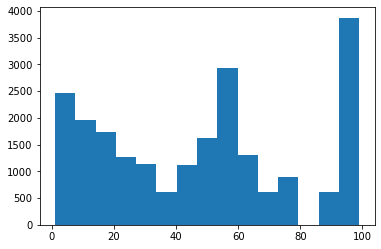

In [702]:
plt.hist(best_2_s, bins = 15)

# Задача 2

### а)

Мы имеем одно наблюдение.

Какие случаи могут быть:

На первом вызове приезжает таксист с каким-то именем. Потом 4 вызова подряд приезжает опять он. Оставшиеся вызовы приезжают таксисты с разными именами и не таким, как у первого.
$$P = 1 * \left(\frac{1}{n}\right) * \left(\frac{1}{n}\right) * \left(\frac{1}{n}\right)   * \left(\frac{1}{n}\right) * \left(\frac{(n-1)}{n}\right) * \left(\frac{(n-2)}{n}\right) * \left(\frac{(n-3)}{n}\right) * \left(\frac{(n-4)}{n}\right) * \left(\frac{(n-5)}{n}\right)  $$

На первом вызове приезжает таксист с каком-то именем. На втором приезжает это же имя. На 3, 4, 5, 6, 7 вызовах приезжают таксисты с другими уникальными именами. На оставшиеся вызовы приезжают таксисты с именами, которые уже встречались.
$$P = 1 * \left(\frac{1}{n}\right) * \left(\frac{(n-1)}{n}\right) * \left(\frac{(n-2)}{n}\right)   * \left(\frac{(n-3)}{n}\right) * \left(\frac{(n-4)}{n}\right) * \left(\frac{(n-5)}{n}\right) * \left(\frac{6}{n}\right) * \left(\frac{6}{n}\right) * \left(\frac{6}{n}\right)  $$


На первом вызове приезжает таксист с каком-то именем. На втором приезжает это же имя. На следующем приезжает дополнительное уникальное имя, потом неуникальное. Затем вновь уникальное, после чего неуникальное. После этого ещё раз уникальное, затем неуникальное. На последние два приезжают два уникальных имени.
$$P = 1 * \left(\frac{1}{n}\right) * \left(\frac{(n-1)}{n}\right) * \left(\frac{2}{n}\right)   * \left(\frac{(n-2)}{n}\right) * \left(\frac{3}{n}\right) * \left(\frac{(n-3)}{n}\right) * \left(\frac{4}{n}\right) * \left(\frac{(n-4)}{n}\right) * \left(\frac{(n-5)}{n}\right)  $$

На первые 6 вызовов приезжают уникальны имена, после чего те, которые уже были.
$$P = 1 * \left(\frac{(n-1)}{n}\right) * \left(\frac{(n-2)}{n}\right) * \left(\frac{(n-3)}{n}\right)   * \left(\frac{(n-4)}{n}\right) * \left(\frac{(n-5)}{n}\right) * \left(\frac{6}{n}\right) * \left(\frac{6}{n}\right) * \left(\frac{6}{n}\right) * \left(\frac{6}{n}\right)  $$

Итак, искомая вероятность будет суммой множества таких случаев. Заметим, что в каждом случае мы можем выделить произведение констант у дробей 1/n.

При суммме всех случаев вынесем общие множители за скобки и в них останется сумма констант (обозначим за C).

Таким образом, искомая вероятность будет:

$$P = C*\left(\frac{(n-1)(n-2)(n-3)(n-4)(n-5)}{n^9}\right) $$

Далее при решении оптимизационных задач константа C будет опускаться (она не повлияет на ответ, т.к. её убирание будет монотонным преобразованием)

In [142]:
L_s = []

In [143]:
for n in range(6, 200):
    L = 1 / (n ** 4)
    for i in range(6):
        L *= (n-i) / n
    L_s.append(L)

Text(0, 0.5, 'Значение функции правдоподобия')

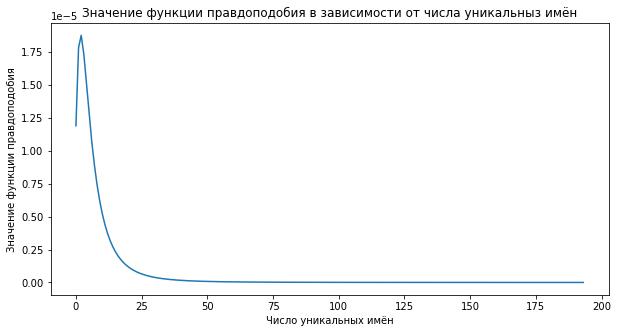

In [145]:
plt.figure(figsize = (10, 5))
plt.plot( L_s)
plt.title('Значение функции правдоподобия в зависимости от числа уникальныз имён')
plt.xlabel('Число уникальных имён')
plt.ylabel('Значение функции правдоподобия')

Не будем записывать lnL потому что воспользуемся вольфрамом.
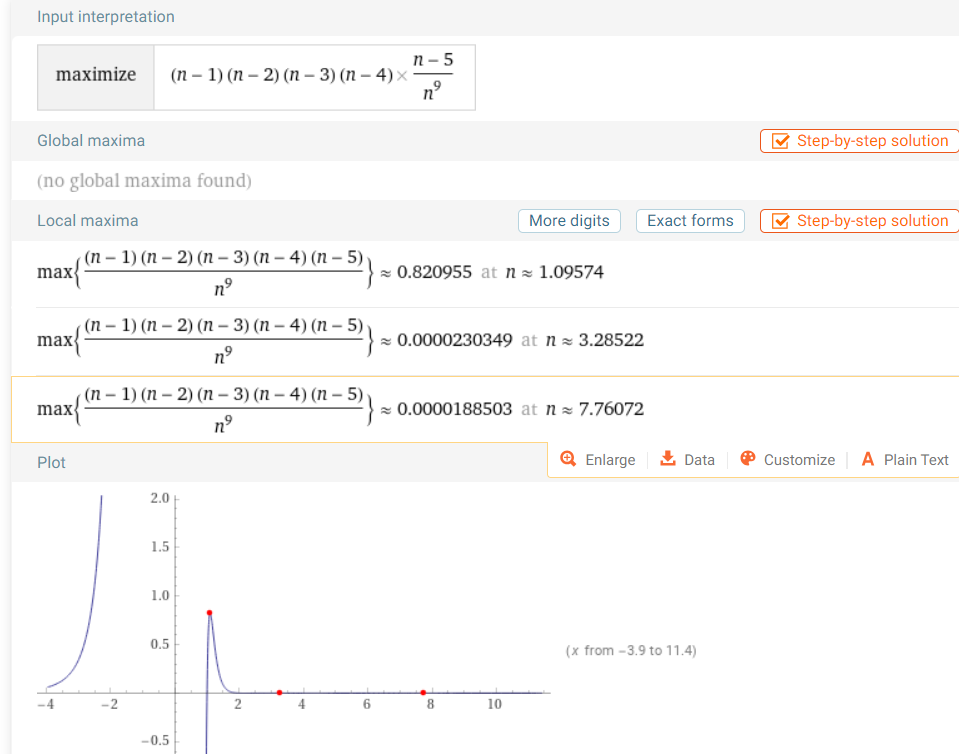

Необходимо округлить получившееся число.

 $$n = 8$$

### б)

In [32]:
import itertools

In [68]:
E_s = []
n_s = np.arange(1, 20)
unique = 6
days = np.arange(0, 10)

In [71]:
for n in n_s:
    E = 0
    for day in days:
        for unique in range(0, day + 1):
            P = 1
            for i in range(1, unique):
                P *= ((n-i)/n)
            combs = itertools.combinations_with_replacement(np.arange(1, unique + 1), day)
            cnt = 0
            for comb in combs:
                mult = 1
                for i in range(0, day - unique):
                    mult = mult * comb[i]
                a = a + mult
            P = P * (a / (n ** (day - unique)))
            E = E + P * unique
    E_s.append(E)

C:\Users\1678~1\AppData\Local\Temp/ipykernel_1732/2118739124.py:15: RuntimeWarning: invalid value encountered in long_scalars
  L *= (cnt / (n ** (day - unique)))
C:\Users\1678~1\AppData\Local\Temp/ipykernel_1732/2118739124.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  L *= (cnt / (n ** (day - unique)))


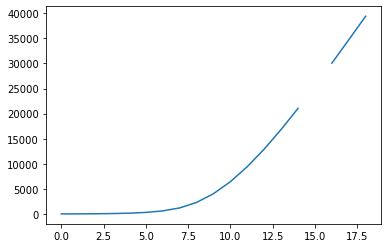

In [72]:
plt.plot(E_s)

In [49]:
len(E_s)

19

### в)

In [695]:
vari = np.random.choice(range(1,21), size=(10000,10))

In [696]:
vib = [len(set(i)) for i in vari]

In [ ]:
for v in vib:
    for n in range(6, 200):
        L = 1 / (n ** 4)
        for i in range(6):
            L *= (n-i) / n
        L_s.append(L)

# Задача 3

In [572]:
import scipy.stats as sts

### а)

In [573]:
np.random.seed(5)

rv = sts.expon(scale=1)

samples = rv.rvs((10000, 20))
sr_real = rv.mean() 


In [574]:
count_a = 0
count_nb = 0
count_tb = 0

In [575]:
np.random.seed(5)
for i in tqdm(samples):
    sr = np.mean(i)
    var = np.var(i)
    
    #aсс. инт.
    interv = sts.norm.interval(alpha=0.95, loc=sr, scale=(var/20)**0.5)
    count_a = count_a + (interv[0] < sr_real < interv[1])
    
    #naive bootstrap
    boo = np.random.choice(i, size=(10000,20), replace=True)
    boo_sr = np.mean(boo, axis = 1)
    boo_int = [np.quantile(boo_sr, 0.025), np.quantile(boo_sr, 0.975)]
    count_nb = count_nb + (boo_int[0] < sr_real < boo_int[1])
    
    #t bootstrap
    t_boo = np.random.choice(i, size=(10000,20), replace=True)
    t_boo_sr = np.mean(t_boo, axis = 1)
    t_boo_var = (np.var(t_boo, axis = 1)/20)**0.5
    quant1 = np.quantile((t_boo_sr-sr)/t_boo_var, 0.025)
    quant2 = np.quantile((t_boo_sr-sr)/t_boo_var, 0.975)
    t_boo_int = [sr - quant2*((var/20)**0.5), sr - quant1*((var/20)**0.5)]
    count_tb = count_tb + (t_boo_int[0] < sr_real < t_boo_int[1])

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:39<00:00, 100.52it/s]


In [576]:
print('Вероятность накрытия классическим асимптотическим нормальным интервалом', count_a/10000)
print('Вероятность накрытия наивным бутстрепом', count_nb/10000)
print('Вероятность накрытия бутстрепом t-статистики', count_tb/10000)


Вероятность накрытия классическим асимптотическим нормальным интервалом 0.9012
Вероятность накрытия наивным бутстрепом 0.9076
Вероятность накрытия бутстрепом t-статистики 0.9488


### б)

In [577]:
np.random.seed(5)

rv = sts.t(df=3)

samples = rv.rvs((10000, 20))
sr_real = rv.mean() 

In [578]:
count_a = 0
count_nb = 0
count_tb = 0

In [579]:
np.random.seed(5)
for i in tqdm(samples):
    sr = np.mean(i)
    var = np.var(i)
    
    #aсс. инт.
    interv = sts.norm.interval(alpha=0.95, loc=sr, scale=(var/20)**0.5)
    count_a = count_a + (interv[0] < sr_real < interv[1])
    
    #naive bootstrap
    boo = np.random.choice(i, size=(10000,20), replace=True)
    boo_sr = np.mean(boo, axis = 1)
    boo_int = [np.quantile(boo_sr, 0.025), np.quantile(boo_sr, 0.975)]
    count_nb = count_nb + (boo_int[0] < sr_real < boo_int[1])
    
    #t bootstrap
    t_boo = np.random.choice(i, size=(10000,20), replace=True)
    t_boo_sr = np.mean(t_boo, axis = 1)
    t_boo_var = (np.var(t_boo, axis = 1)/20)**0.5
    quant1 = np.quantile((t_boo_sr-sr)/t_boo_var, 0.025)
    quant2 = np.quantile((t_boo_sr-sr)/t_boo_var, 0.975)
    t_boo_int = [sr - quant2*((var/20)**0.5), sr - quant1*((var/20)**0.5)]
    count_tb = count_tb + (t_boo_int[0] < sr_real < t_boo_int[1])

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:37<00:00, 102.11it/s]


In [580]:
print('Вероятность накрытия классическим асимптотическим нормальным интервалом', count_a/10000)
print('Вероятность накрытия наивным бутстрепом', count_nb/10000)
print('Вероятность накрытия бутстрепом t-статистики', count_tb/10000)


Вероятность накрытия классическим асимптотическим нормальным интервалом 0.9318
Вероятность накрытия наивным бутстрепом 0.9151
Вероятность накрытия бутстрепом t-статистики 0.9209


### в)

В пункте а) бутстреп t стратистики оказался лучше, а в пункте б) ассимптотический нормальный интервал.

# Задача 4

In [581]:
df = pd.read_excel('22-23_hse_probability.xlsx')[['Last name', 'Name',  'Unnamed: 72']]

In [582]:
df['Экзамен'] = df['Unnamed: 72']

In [583]:
df = df.loc[5:][['Last name', 'Name',  'Экзамен']]

In [584]:
df.head()

,Last name,Name,Экзамен
5,Репенкова,Полина Александровна,16.0
6,Ролдугина,Софья Александровна,0.0
7,Сафина,Алия Линаровна,19.0
8,Сидоров,Иван Максимович,26.0
9,Солоухин,Иван Владимирович,21.0


In [585]:
vow = ['А','Я','У','Ю','О','Е','Ё','Э','И','Ы']

In [586]:
df_gl = df.loc[df['Last name'].astype(str).str[0].isin(vow)]

In [587]:
df_sogl = df.loc[~df['Last name'].astype(str).str[0].isin(vow)]

In [588]:
gl = df_gl['Экзамен']

In [589]:
sogl = df_sogl['Экзамен']

### а)

In [590]:
from scipy.stats import ttest_ind

In [591]:
sts.ttest_ind(gl, sogl, equal_var=False)[1] #p value

0.3974027153843839

In [592]:
sts.ttest_ind(gl, sogl, equal_var=False)[1] > 0.05 

True

Нет оснований отвергать гипотезу. Ожидаемые рез-ы экзамена равны в группах

### б)

In [622]:
np.random.seed(23)
gl_boo = np.random.choice(gl, size=(10000, len(gl)))
sogl_boo = np.random.choice(sogl, size=(10000, len(sogl)))
real_diff = np.mean(gl) - np.mean(sogl)
boo_diff = np.mean(gl_boo, axis = 1) - np.mean(sogl_boo, axis = 1)

In [623]:
quant1 = np.quantile(boo_diff, 0.025) 
quant2 = np.quantile(boo_diff, 0.975)

In [624]:
[real_diff - quant2, real_diff - quant1]

[-2.428414581380252, 2.3905999855772713]

0 входит в указанный интервал. Не отвергаем гипотезу.

In [625]:
2 * min(np.mean((np.array(boo_diff) > 0)), np.mean((np.array(boo_diff) < 0))) #p value

0.3864

In [626]:
2 * min(np.mean((np.array(boo_diff) > 0)), np.mean((np.array(boo_diff) < 0))) > 0.05 

True

Нет оснований отвергать гипотезу. 

### в)

In [627]:
np.random.seed(23)
gl_boo = np.random.choice(gl, size=(10000, len(gl)))
sogl_boo = np.random.choice(sogl, size=(10000, len(sogl)))
real_diff = np.mean(gl) - np.mean(sogl)
boo_diff = np.mean(gl_boo, axis = 1) - np.mean(sogl_boo, axis = 1)

real_std = (np.var(gl)/len(gl))**0.5 + (np.var(sogl)/len(sogl))**0.5
boo_std = (np.var(gl_boo, axis=1)/len(gl_boo))**0.5 + (np.var(sogl_boo, axis=1)/len(sogl_boo))**0.5

In [628]:
quant1 = np.quantile((boo_diff-real_diff)/boo_std, 0.025)
quant2 = np.quantile((boo_diff-real_diff)/boo_std, 0.975)

In [629]:
[real_diff - quant2 * real_std, real_diff - quant1 * real_std]

[-27.171661684466343, 23.324926567350673]

0 входит в указанный интервал. Не отвергаем гипотезу.

In [630]:
2 * min(np.mean((boo_diff - real_diff) / boo_std <= real_diff / real_std), np.mean((boo_diff - real_diff) / boo_std >= real_diff / real_std))
#p value

0.9234

Нет оснований отвергать гипотезу. 

### г)

In [631]:
from itertools import permutations

In [632]:
np.random.seed(23)
simd = []

for i in range(0, 100000):
    
    prmtd = np.random.permutation(df['Экзамен'])
    
    sogl_sc, gl_sc = prmtd[:len(sogl)], prmtd[len(sogl):]
    
    diff_s = np.mean(sogl_sc) - np.mean(gl_sc)
    
    simd.append(diff_s)

In [633]:
2 * min(np.mean(np.array(simd) > np.mean(gl) - np.mean(sogl)), np.mean(np.array(simd) <= np.mean(gl) - np.mean(sogl)))
#p_value

0.37786

In [634]:
2 * min(np.mean(np.array(simd) > np.mean(gl) - np.mean(sogl)), np.mean(np.array(simd) <= np.mean(gl) - np.mean(sogl))) > 0.05

True

Нет оснований отвергать гипотезу. 

# Задача 5

In [697]:
median = df['Экзамен'].median()

table = pd.DataFrame({'Меньше': [np.sum(df_gl['Экзамен'] < median), np.sum(df_sogl['Экзамен'] < median)], 
                      'Больше': [np.sum(df_gl['Экзамен'] > median), np.sum(df_sogl['Экзамен'] < median)]}).rename(index={0: 'Согл', 1: 'Гл'})
table

,Меньше,Больше
Согл,28,21
Гл,138,138


### а)

In [636]:
OR = (21 / 28) / (145 / 138) 
OR

0.7137931034482758

In [637]:
se = np.sqrt(1/145 + 1/138 + 1/21 + 1/28)
se

0.3122118861751831

In [638]:
[OR * np.exp(-sts.norm.ppf(1 - 0.025) * se), OR * np.exp(sts.norm.ppf(1 - 0.025) * se)]

[0.38709459582547806, 1.3162172761513564]

In [639]:
p_value = 2 * min( sts.norm.cdf(np.log(OR) / se), 1 - sts.norm.cdf(-np.log(OR) / se) )

In [640]:
p_value #>0.05, нет оснований отвергать

0.280180274566451

### б)

$$ lnp' примерно= lnp + 1/p * (p'-p) $$ где p' - оценка

In [641]:
RR = (21 / (28+21)) / (145 / (138+145))
RR

0.8364532019704434

In [642]:
se = (1 / 145 + 1 / 21 - 1 / (145 + 138) - 1 / (21 + 28))**0.5
se

0.17485384517729596

In [643]:
[RR * np.exp(-sts.norm.ppf(1 - 0.025) * se), RR * np.exp(sts.norm.ppf(1 - 0.025) * se)]


[0.5937529565040844, 1.1783586951819993]

In [644]:
p_value = 2 * min( sts.norm.cdf(np.log(RR) /se), 1 - sts.norm.cdf(-np.log(RR) /se) )

In [645]:
p_value # >0.05, нет оснований отвергать

0.3070947928050547

### в)

In [682]:
np.random.seed(23)
odds = []

for i in range(0, 10**4):
    
    sogl_boo = np.random.choice(sogl, size=(1, len(sogl)))
    gl_boo = np.random.choice(gl, size=(1, len(gl)))
    al = np.concatenate((sogl_boo, gl_boo), axis = 1)

    med_boo = np.median(al)
    
    sogl_more_boo = len(np.where(sogl_boo > med_boo)[0])
    sogl_less_boo = len(np.where(sogl_boo < med_boo)[0])
    
    gl_more_boo = len(np.where(gl_boo > med_boo)[0])
    gl_less_boo = len(np.where(gl_boo < med_boo)[0])
    
    OR_boo = (gl_more_boo / gl_less_boo) / (sogl_more_boo / sogl_less_boo)
    odds.append(OR_boo)

In [683]:

for i in odds:
    q1 = 0
    if i > 1:
        q1 = q1 + 1
        
for i in odds:
    q2 = 0
    if i < 1:
        q1 = q1 + 1

In [684]:
2 * min(1- (q1 / 10000), 1-(q2 / 10000) ) #p value > 0.05, не отвергается

0.36240000000000006

# Задача 6

### а)

In [646]:
lens = [len(strr) for strr in df['Last name']]

score = list(df['Экзамен'])

In [647]:
b = np.mean(score) / np.mean(lens)
b

2.0613026819923372

In [648]:
corr = sts.pearsonr(lens, score)[0]
corr

0.0253280526691477

### б)

In [649]:
np.random.seed(42)
corr_s= []

for i in range(0, 10000):
    
    perms = np.random.permutation(score)
    
    perms_2 = sts.pearsonr(lens, perms)[0]
    
    corr_s.append(perms_2)

In [650]:
quant1 = np.percentile(corr_perm, 0.25)
quant2 = np.percentile(corr_perm, 0.975)

p_value = 2*np.mean(np.array(corr_s) > corr)
p_value #нет оснований отвергать тк > 0.5

0.6574

# Задача 7

## Задача из контрольной 1 2021-2022 года. Chat GPT вначале неправильно её решил, затем было дано указание на ошибку и наводка, после чего было получен верный ответ.

### Я

У Васи в рюкзаке два сладких и три кислых яблока. Наугад Вася достал два яблока. Наудачу
попробовал одно яблоко из них, а оно оказалось кислым.
Найдите вероятность того, что второе яблоко также окажется кислым.

### Chat GPT

Есть три случая возможного выбора первого яблока:

1) первое яблоко кислое (Вероятность 3/5), тогда второе яблоко кислое (2/4), что даёт общую вероятность 3/5 * 2/4 = 3/10

2) первое яблоко сладкое (Вероятность 2/5), тогда второе яблоко кислое (3/4), что даёт общую вероятность 2/5 * 3/4 = 3/10

3) Это обратный вариант случая 2, когда первое яблоко кислое (3/5), а второе сладкое (2/4). Общая вероятность такого исхода также 3/10.

Таким образом, общая вероятность того, что второе яблоко окажется кислым, равна сумме вероятностей всех возможных исходов, когда первое яблоко оказалось кислым:
3/10 + 3/10 + 3/10 = 9/10.

Ответ: вероятность того, что второе яблоко окажется кислым, равна 9/10.

### Я

Ответ неверный. Ты не использовал формулу условной вероятности

### Chat GPT

Действительно, можно решить эту задачу с помощью формулы условной вероятности. Обозначим событие «первое яблоко кислое» за A, а событие «второе яблоко кислое» за B. Тогда вероятность того, что второе яблоко кислое при условии, что первое яблоко было кислым, равна:

P(B|A) = P(A∩B) / P(A)

P(A∩B) - вероятность того, что оба яблока кислые, равна (3/5) * (2/4) = 3/10.

P(A) - вероятность того, что первое яблоко кислое, равна 3/5.

Тогда:

P(B|A) = (3/10) / (3/5) = 1/2.

Таким образом, вероятность того, что второе яблоко окажется кислым при условии, что первое яблоко было кислым, равна 1/2.

Ответ: вероятность того, что второе яблоко окажется кислым при условии, что первое яблоко было кислым, равна 1/2.

## Задача из контрольной 1 2019-2020 года. Chat GPT вначале неправильно посчитал арифметическое выражение, на что ему было указано. После он выдал решение.

### Я

На курсе теории вероятностей 10% студентов никогда не списывают, 10% студентов списывают всегда,
оставшиеся 80% списывают с вероятностью 0.05 на каждой контрольной независимо от предыдущих.
Каждый списывающий студент будет пойман пойман ассистентом Матвеем Беспощадным с
вероятностью 0.8. Найдите вероятность того, что случайно выбранный студент будет списывать на первой контрольной

### Chat GPT

Обозначим события:

- A - студент никогда не списывает

- B - студент списывает всегда

- C - студент списывает на первой контрольной

- D - студент пойман Матвеем на первой контрольной

Тогда вероятности:

- P(A) = 0.1

- P(B) = 0.1

- P(C|~A&~B) = 0.05

- P(D|~A&~B&C) = 0.8


Найдем вероятность, что случайно выбранный студент будет списывать на первой контрольной:

P(C) = P(~A&~B) * P(C|~A&~B) + P(A) * 0 + P(B) * 1

P(C) = 0.8 * 0.05 + 0.1 * 0 + 0.1 * 1

P(C) = 0.12


То есть вероятность того, что случайно выбранный студент будет списывать на первой контрольной, равна 0.12.


### Я

Ты неверно посчитал выражение для P(C). Пересчитай

### Chat GPT

Действительно, я допустил ошибку. Вероятность того, что случайно выбранный студент будет списывать на первой контрольной, должна быть вычислена как:

P(C) = P(~A & ~B & C) + P(A & C) + P(B & C)

При этом вероятность P(~A & ~B & C) равна:

P(C|~A&~B) = 0.05

P(~A&~B) = 0.8

P(~A&~B&C) = P(C|~A&~B) * P(~A&~B) = 0.05 * 0.8 = 0.04

А вероятности P(A & C) и P(B & C) равны 0, так как студенты, которые никогда не списывают или списывают всегда, не могут списывать на первой контрольной.

Следовательно, итоговая вероятность будет равна:
P(C) = 0.04 + 0 + 0.1 * 1 = 0.14

Таким образом, вероятность того, что случайно выбранный студент будет списывать на первой контрольной, равна 0.14.


## Задача из контрольной 1 2019-2020 года. Chat GPT по пути совершал ошибки, на которые ему указывалось, и которые он корректировал после. Затем он выдал решение.

### Я

Поручик Ржевский, считая себя любимчиком фортуны, играет на деньги в русскую рулетку.
В шестизарядном револьвере заряжен только один патрон. Раунд игры состоит в том, что Ржевский
случайно вращает барабан, приставляет револьвер к виску и нажимает на спусковой крючок.
Если после нажатия на крючок поручик жив, то он получает 200 тысяч рублей. Раунды повторяются до
тех пор, пока поручик не застрелится.
Найдите
а) вероятность того, что поручику удастся стать миллионером до смерти;

### Chat GPT

Вероятность выжить после первого выстрела равна 5/6, так как в револьвере осталось 5 пустых гнезд из 6 возможных. Вероятность выжить после двух выстрелов равна (5/6) * (4/5) = 2/3, так как после первого выстрела в револьвере осталось 4 пустых гнезда из 5 возможных. Аналогично, вероятность выжить после трех выстрелов равна (5/6) * (4/5) * (3/4) = 1/2, после четырех - (5/6) * (4/5) * (3/4) * (2/3) = 1/3, после пяти - (5/6) * (4/5) * (3/4) * (2/3) * (1/2) = 1/6. Таким образом, вероятность стать миллионером до смерти равна сумме вероятностей выжить после каждого раунда игры до того момента, когда поручик застрелится: (5/6) + (2/3)*(1/6) + (1/2)*(1/6)*(1/6) + (1/3)*(1/6)*(1/6)*(1/6) + ... Это бесконечная геометрическая прогрессия с первым членом 5/6 и знаменателем 6, поэтому ее сумма равна (5/6)/(1 - 1/6) = 5/5 = 1. Таким образом, вероятность стать миллионером до смерти равна 1. Однако, это не означает, что поручику обязательно удастся выиграть миллион рублей, так как он может застрелиться раньше.

### Я

Неверно. Имей в виду, что он станет миллионером, если сыграет не менее 6 раундов

### Chat GPT

Правильно. Если он сыграет не менее 6 раундов, то он получит 1 миллион долларов.


### Я

Твой ответ с вероятностью 1 неверен. Пересчитай задачу с тем условием, что он станет миллионером, если сыграет не менее 6 раундов. Прогрессия не бесконечная


### Chat GPT

Извините за техническую ошибку в предыдущем ответе. 
Если поручик должен сыграть не менее 6 раундов, чтобы стать миллионером, то есть два возможных пути к выигрышу:

1) первый раунд - проигрыш, а затем 5 выигрышей подряд;
2) первый раунд - выигрыш, а затем 5 выигрышей подряд.

Вероятность проигрыша в одном раунде игры все еще равна 5/6. Вероятность выигрыша в одном раунде игры теперь равна 1/6. 

1) Вероятность выиграть 5 раундов подряд: (1/6)^5
2) Вероятность выиграть 4 раунда подряд, а затем проиграть и выиграть еще два: (1/6)^4 *(5/6)*(1/6)^2

Таким образом, общая вероятность стать миллионером (выиграть не менее 6 раундов) составляет:

(1/6)^5 + (1/6)^4 *(5/6)*(1/6)^2 = 1/6^5*(1 + 5/6*(1/6)^2) = 0.0001409 или около 0.014%. 

Шансы на успех по-прежнему крайне низкие.

### Я

Неверно. Воспользуйся геометрическим распределением

### Chat GPT

Вы правы, можно воспользоваться геометрическим распределением. 

Вероятность успеха в одном раунде игры равна 1/6, вероятность неудачи - 5/6. Тогда вероятность того, что поручик выиграет не менее 6 раундов подряд, можно выразить с помощью геометрического распределения:

P(X≥6) = (1 - p)^5 * p

где p - вероятность успеха в одном раунде, (1-p)^5 - вероятность проигрыша 5 раундов подряд.

Таким образом, 

P(X≥6) = (5/6)^5 * (1/6) = 3125/46 656  = 0.067

Или около 6,7%. 
Стоит отметить, что это значительно выше, чем результат, полученный ранее. Однако, игра в русскую рулетку по-прежнему очень опасна и не рекомендуется!

### Я

Ты посчитал вероятность для числа раундов равного 6, а тебе надо больше либо равно 6

### Chat GPT 

Вы правы, я ошибочно посчитал вероятность выигрыша в 6 раундах подряд, а не больше или равно 6 раундах. 

Тогда вероятность успешного выигрыша в игре описывается с помощью суммы бесконечно убывающей геометрической прогрессии:

P = p(1 + (1-p) + (1-p)^2 + (1-p)^3 + ...)

Подставляя значения p = 1/6 и 1-p = 5/6, получаем:

P = (1/6)/(1 - 5/6) = (1/6)/(1/6) = 1

Таким образом, вероятность, что поручику удастся стать миллионером до смерти (выиграть не менее 6 раундов подряд) равна 1, т. е. это событие обязательно произойдет. Однако, напомню, что игра в русскую рулетку крайне опасна и может привести к печальным последствиям.

### Я 

Ты сделал не то. У тебя просто был лишний множитель 1/6

### Chat GPT

Да, ты прав. Я сделал ошибку: вместо того, чтобы вычесть из 1 вероятность проигрыша (5/6), я вычел вероятность успеха (1/6). Поэтому получилась лишний множитель 1/6. 

Таким образом, вероятность выиграть не менее 6 раундов подряд при игре в русскую рулетку, выраженная через геометрическое распределение, равна:

P(X ≥ 6) = (1 - p)^5 = (5/6)^5 ≈ 0,327 = 32,7%. 

Благодарю за поправку.

### Я

Ты неверно возвёл 5/6 в 5 степень. Пересчитай


### Chat GPT

Да, вы правы, произошла опечатка. Возводя 5/6 в 5 степень, я допустил ошибку. Правильно должно быть:

P(X ≥ 6) = (1 - p)^5 = (5/6)^5 ≈ 0.327 = 32.7%

Извините за неточность в ответе и спасибо за уточнение.

### Я

Сколько будет 5/6 во 2 степени? Сколько будет 5/6 в 3 степени? Умножь получившиеся значения

### Chat GPT

(5/6)^2 = 25/36

(5/6)^3 = 125/216

(25/36) * (125/216) ≈ 0.4282

Ответ: примерно 0.4282.

### Я

Умножь 5/6 пять раз

### Chat GPT

Чтобы умножить 5/6 в степени 5, нужно перемножить 5 раз 5/6 между собой:

(5/6)^5 = (5/6) * (5/6) * (5/6) * (5/6) * (5/6) = 3125/7776

Ответ: 3125/7776.

### Другие задачи, которые я ему давал, решались сразу, что не интересно. Я их вставлять не стал. Вставил лишь те, где ответ был неверен

# Задача 8

Полезным подспорьем в изучении математической статистики для меня была книга Владимира Савельева "Статистика и котики" (прилагаю ссылку на pdf) https://vk.com/doc-50757966_526114641?hash=QSVoQdkZACeK1ygtr3ON4eAgCz6YQxdRY5gZ1kCC18s&dl=inInipOwA32kqOXk3Zc2FwBwyXJI3TFzUtk2Z4ZGbwg 

Во-первых, мне было интересно как тот материал, что мы проходим, можно подать в научпоповском ключе. Во-вторых, в некоторых темах мне хотелось укрепить интуитивное представление о проходимых вещах.

Я в самом деле получил представление о том, как наглядно и доступно для широкой аудитории можно с помощью картинок и близких вещей доносить не всегда очевидные вещи. Например, про t-критерий Стьюдента, U-критерий Манна Уитни. 

Больше всего я обращался к этому источнику при прохождении темы "Проверка гипотез", в частности p-value. Книга помогла более наглядно понять этот топик.

Также очень была полезна книга http://statistics.zone/, материал некоторых тем которой был перенесён на чист лист. Очень облегчила процесс поиска информации.